In [1]:
import pandas as pd
from HelperFunctions.model_performance import *
from HelperFunctions.feature_visualizations import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

----------------------

# Change in Test Statistics Across 100 Iterations of Test Harness runs with Random Forest Classifier

----------------------


**_The Test Harness_**

In order to carry out machine learning iterations at a large scale, the [TestHarness](https://gitlab.sd2e.org/sd2program/test-harness) was used. It includes automatic model performance testing, consistent data formatting, and data split flexibility. 

The test harness includes two methods: **run_custom** and **loo_run**; customized model run and LeaveOneOut model run, where the model is trained on all topologies except one that is left out for testing. 

**Test Statistics**

In classification problems, test statistics consist of **True Positive (TP)** (predicted: `True`, actual value: `True`), **True Negative (TN)** (predicted: `False`, actual value: `False`), **False Positive (FP)** (predicted: `True`, actual value:`False`), and **False Negative (FN)** (predicted: `False`, actual value: `True`). ]

In terms of protein design, __a False Positive could be considered riskier__ since it entails an investment of resources into a protein that will not be stable. Reducing FP rates could lead to a more cost efficient process in protein development.

In [2]:
#load leaderboard
leaderboard = pd.read_html('./data/cross_val_tptn_classification_leaderboard.html')[0]

#get names of rosetta runs
rosetta_runs = leaderboard[leaderboard['Data and Split Description']=='R']
rosetta_runs_names = list(rosetta_runs['Run ID'].values)

#get names of R+S runs
entropy_rosetta_runs = leaderboard[leaderboard['Data and Split Description']=='RS']
entropy_rosetta_runs_names = list(entropy_rosetta_runs['Run ID'].values)

### Rosetta Model Test Statistics data extraction

In [3]:
# "R" Model

#initialize dataframe that will contain data
ros_df = pd.DataFrame()
ros_df['TP Count'] = []
ros_df['FP Count'] = []
ros_df['TN Count'] = []
ros_df['FN Count'] = []

#initialize empty lists for data
ros_tp_data = []
ros_tn_data = []
ros_fp_data = []
ros_fn_data = []

#loop through files
for run_name in rosetta_runs_names:
    df = pd.read_csv('./test_harness_runs/tptn_runs/run_%s/testing_data.csv'%run_name)
    tp,tn,fp,fn = get_tptn_data(df)

    #update the lists
    ros_tp_data.append(tp)
    ros_tn_data.append(tn)
    ros_fp_data.append(fp)
    ros_fn_data.append(fn)

#construct final dataframe
ros_df['TP Count'] = ros_tp_data
ros_df['FP Count'] = ros_fp_data
ros_df['FN Count'] = ros_fn_data
ros_df['TN Count'] = ros_tn_data

In [4]:
ros_df.describe()

,TP Count,FP Count,TN Count,FN Count
count,100.000000,100.000000,100.000000,100.000000
mean,1586.390000,1306.610000,12427.390000,731.610000
std,5.132379,8.461314,8.461314,5.132379
min,1575.000000,1288.000000,12406.000000,717.000000
25%,1583.000000,1300.000000,12422.000000,728.000000
50%,1587.000000,1306.000000,12428.000000,731.000000
75%,1590.000000,1312.000000,12434.000000,735.000000
max,1601.000000,1328.000000,12446.000000,743.000000


### Rosetta+Entropy Model Test Statistics data extraction

In [5]:
# "R+S" Model

#initialize dataframe that will contain data
spc_df = pd.DataFrame()
spc_df['TP Count'] = []
spc_df['FP Count'] = []
spc_df['TN Count'] = []
spc_df['FN Count'] = []

#initialize empty lists for data
spc_tp_data = []
spc_tn_data = []
spc_fp_data = []
spc_fn_data = []

#loop through files
for run_name in entropy_rosetta_runs_names:
    df = pd.read_csv('./test_harness_runs/tptn_runs/run_%s/testing_data.csv'%run_name)
    tp,tn,fp,fn = get_tptn_data(df)

    #update the lists
    spc_tp_data.append(tp)
    spc_tn_data.append(tn)
    spc_fp_data.append(fp)
    spc_fn_data.append(fn)

#construct final dataframe
spc_df['TP Count'] = spc_tp_data
spc_df['FP Count'] = spc_fp_data
spc_df['FN Count'] = spc_fn_data
spc_df['TN Count'] = spc_tn_data

In [6]:
spc_df.describe()

,TP Count,FP Count,TN Count,FN Count
count,100.00000,100.000000,100.000000,100.00000
mean,1565.84000,1261.640000,12472.360000,752.16000
std,6.30331,9.053734,9.053734,6.30331
min,1551.00000,1235.000000,12453.000000,735.00000
25%,1562.00000,1255.500000,12466.750000,748.00000
50%,1565.00000,1262.000000,12472.000000,753.00000
75%,1570.00000,1267.250000,12478.500000,756.00000
max,1583.00000,1281.000000,12499.000000,767.00000


In [7]:
results = spc_df.describe() - ros_df.describe()
results.iloc[1,:]

TP Count   -20.55
FP Count   -44.97
TN Count    44.97
FN Count    20.55
Name: mean, dtype: float64

----------------------------

# Leave One Out Runs
**_Highlight results from the graphs/data_**
In principle, a Leave One Out (LOO) run's model performance will show how generalizable the model is by showing how its learned pattern could apply to unknown protein structures. 

From the graphs below, the Random Forest Classifier results show `insert significant results here!!!`. 
The Random Forest Regressor results how `insert more significant results here`. 

--------------------------

In [8]:
data = pd.read_csv('./data/df_aggregated_spc.csv')
spc_features = pd.read_csv('./data/entropy_features.csv').iloc[:,0].values.tolist()
ros_features = pd.read_csv('./data/rosetta_features.csv').iloc[:,0].values.tolist()

### Classifier Results
**N.B.: must have matplotlib v. 3.0.3**

Printing number of instances per group:
['Rocklin', 'HHH']                  97
['Longxing', 'EHEE']                97
['Longxing', 'HEEH']                97
['Rocklin', 'EEHEE']                97
['Rocklin', 'EHEE']                 97
['Longxing', 'EEHEE']               97
['Rocklin', 'HEEH']                 97
['Eva1', 'Eva2', '4h']              90
['Eva1', 'Eva2', 'fold4']           90
['Eva1', 'Eva2', 'beta_grasp']      90
['Eva1', 'Eva2', 'ferredoxin']      90
['Eva1', 'Eva2', 'coil']            90
['Eva1', 'Eva2', 'fold2']           90
['Eva1', 'Eva2', 'thio']            90
['Eva1', 'Inna', 'Eva2', 'HHH']     81
['181114_Benjamin_NTF2', 'NTF2']    16
['Inna', 'Eva1', 'Eva2', 'HHH']      9
['Eva2', 'Eva1', 'coil']             7
['Eva2', 'Eva1', 'fold2']            7
['Eva2', 'Eva1', 'fold4']            7
['Eva2', 'Eva1', 'beta_grasp']       7
['Eva2', 'Eva1', '4h']               7
['Eva2', 'Eva1', 'thio']             7
['Eva2', 'Eva1', 'ferredoxin']       7
['Eva2', 'Eva1', 'Inna',

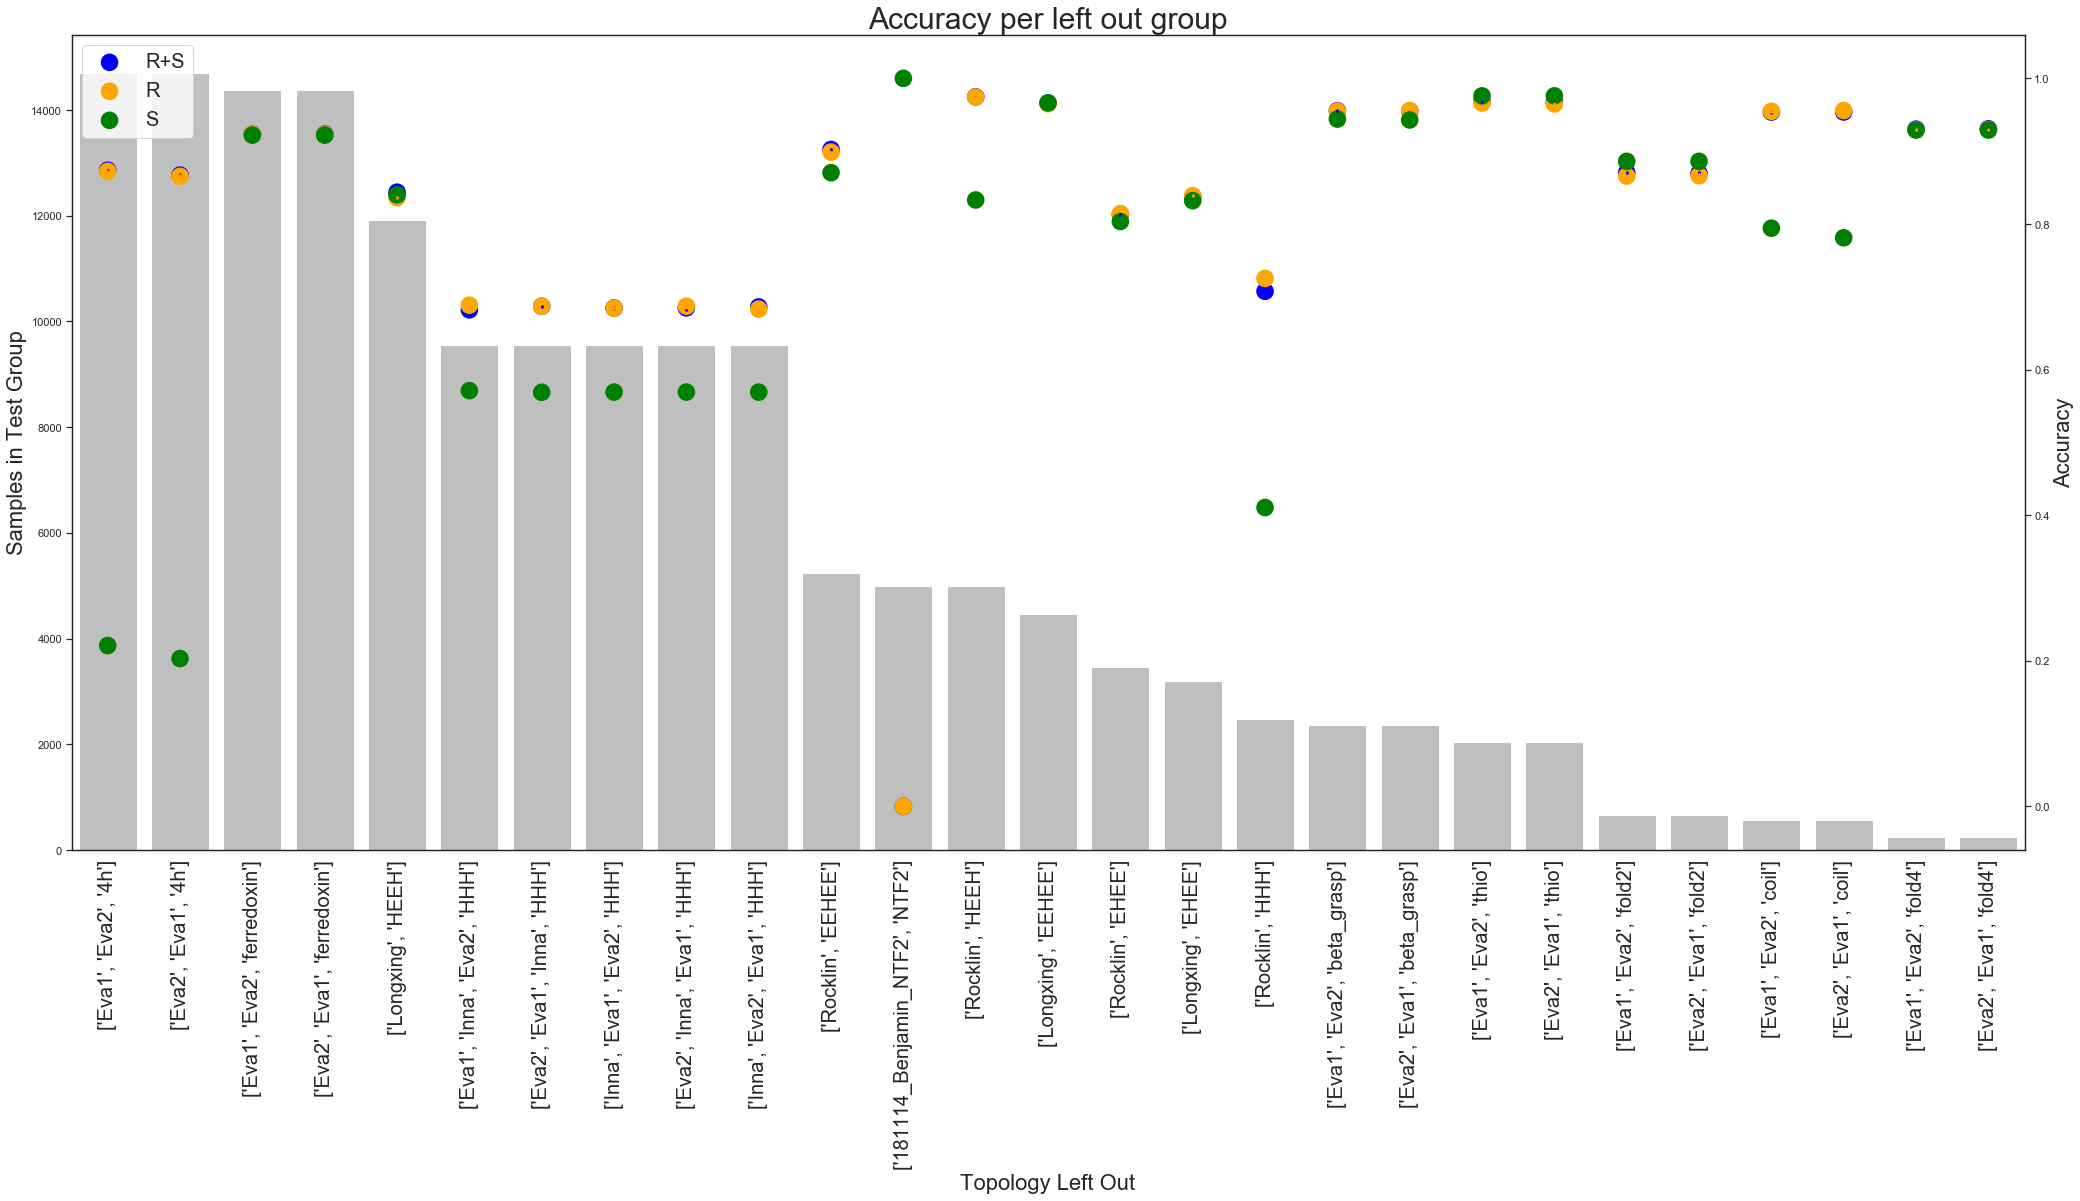

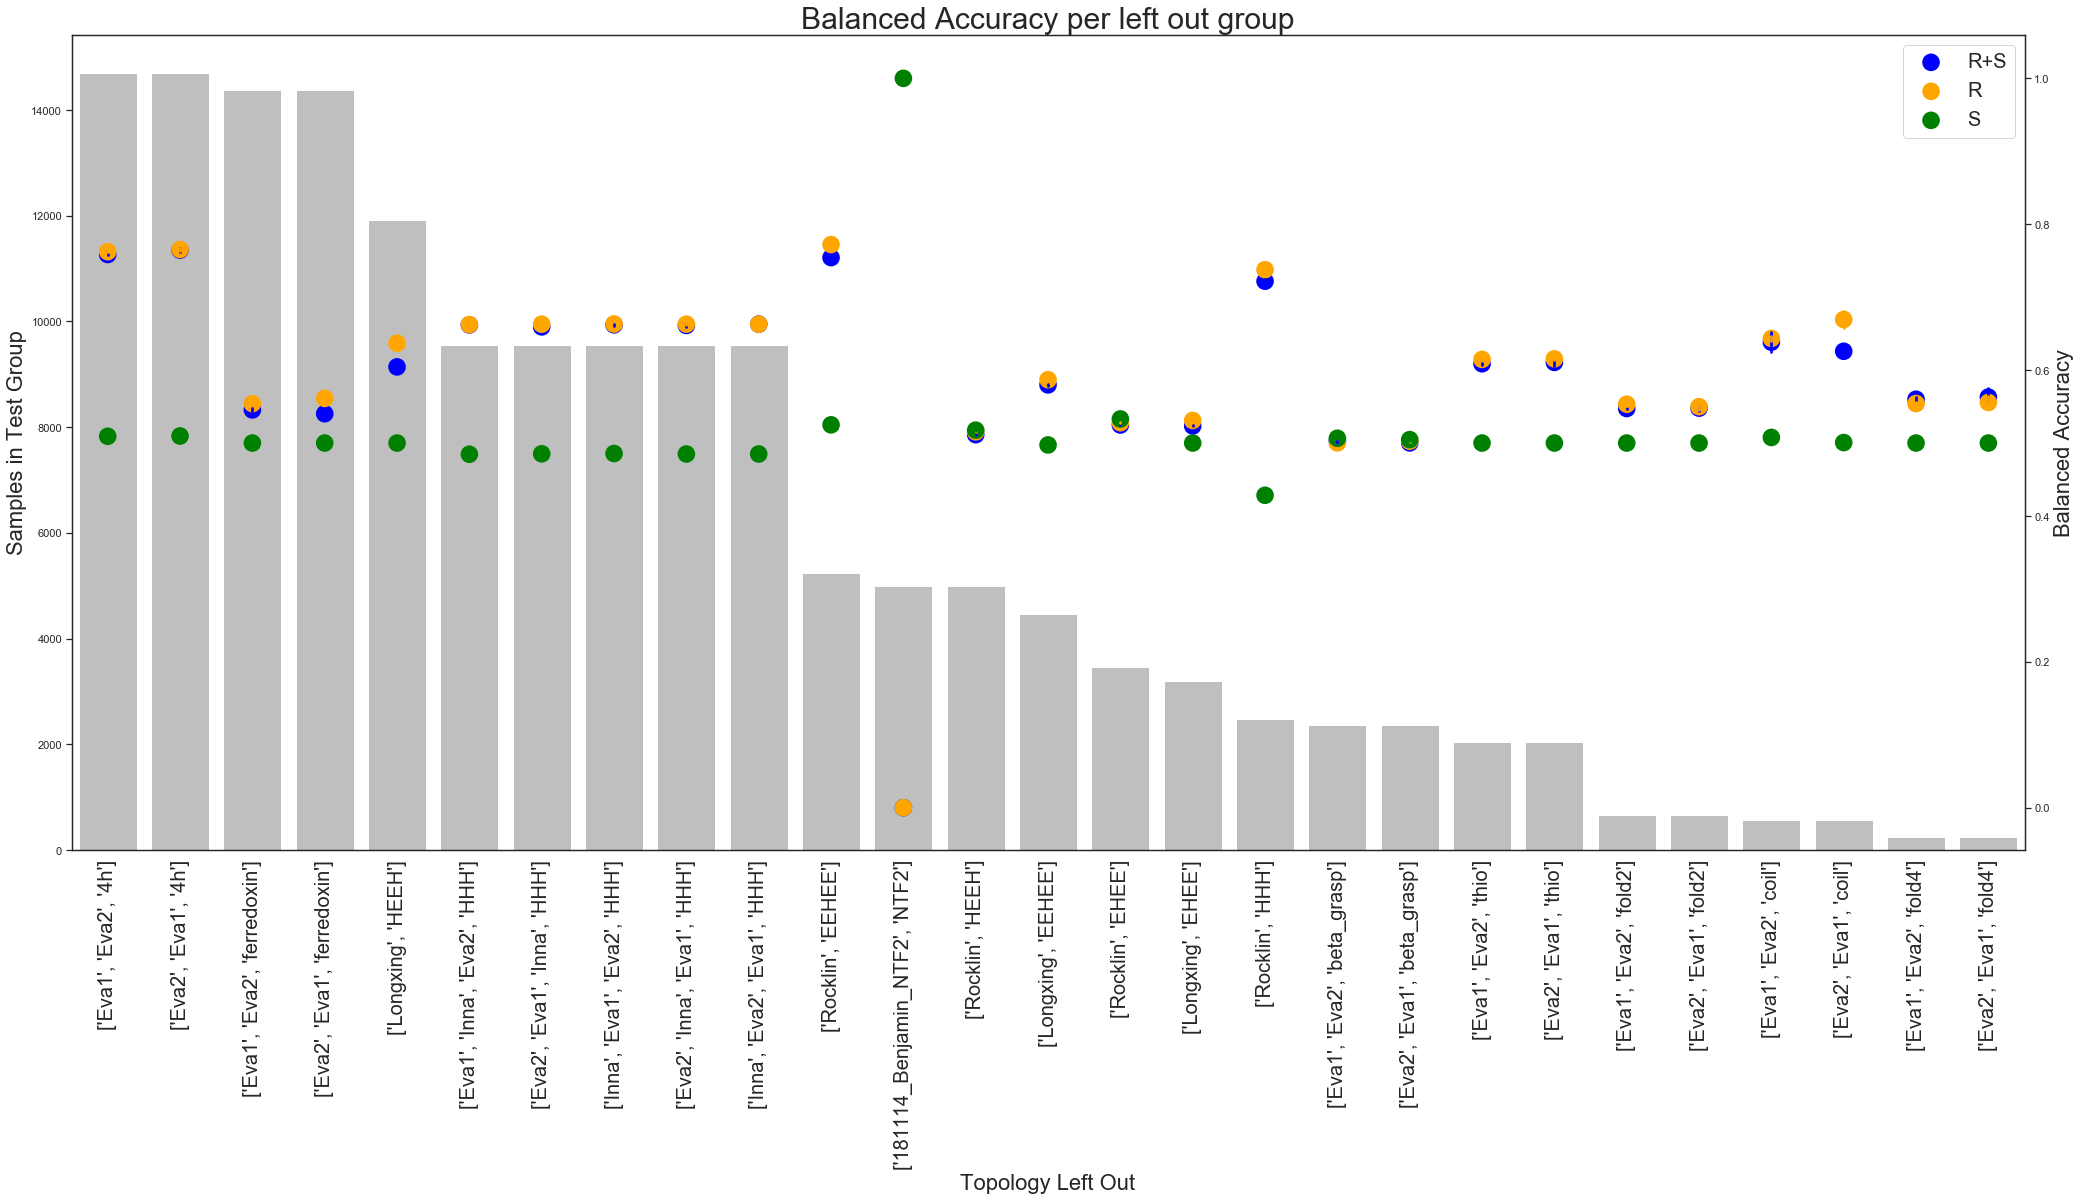

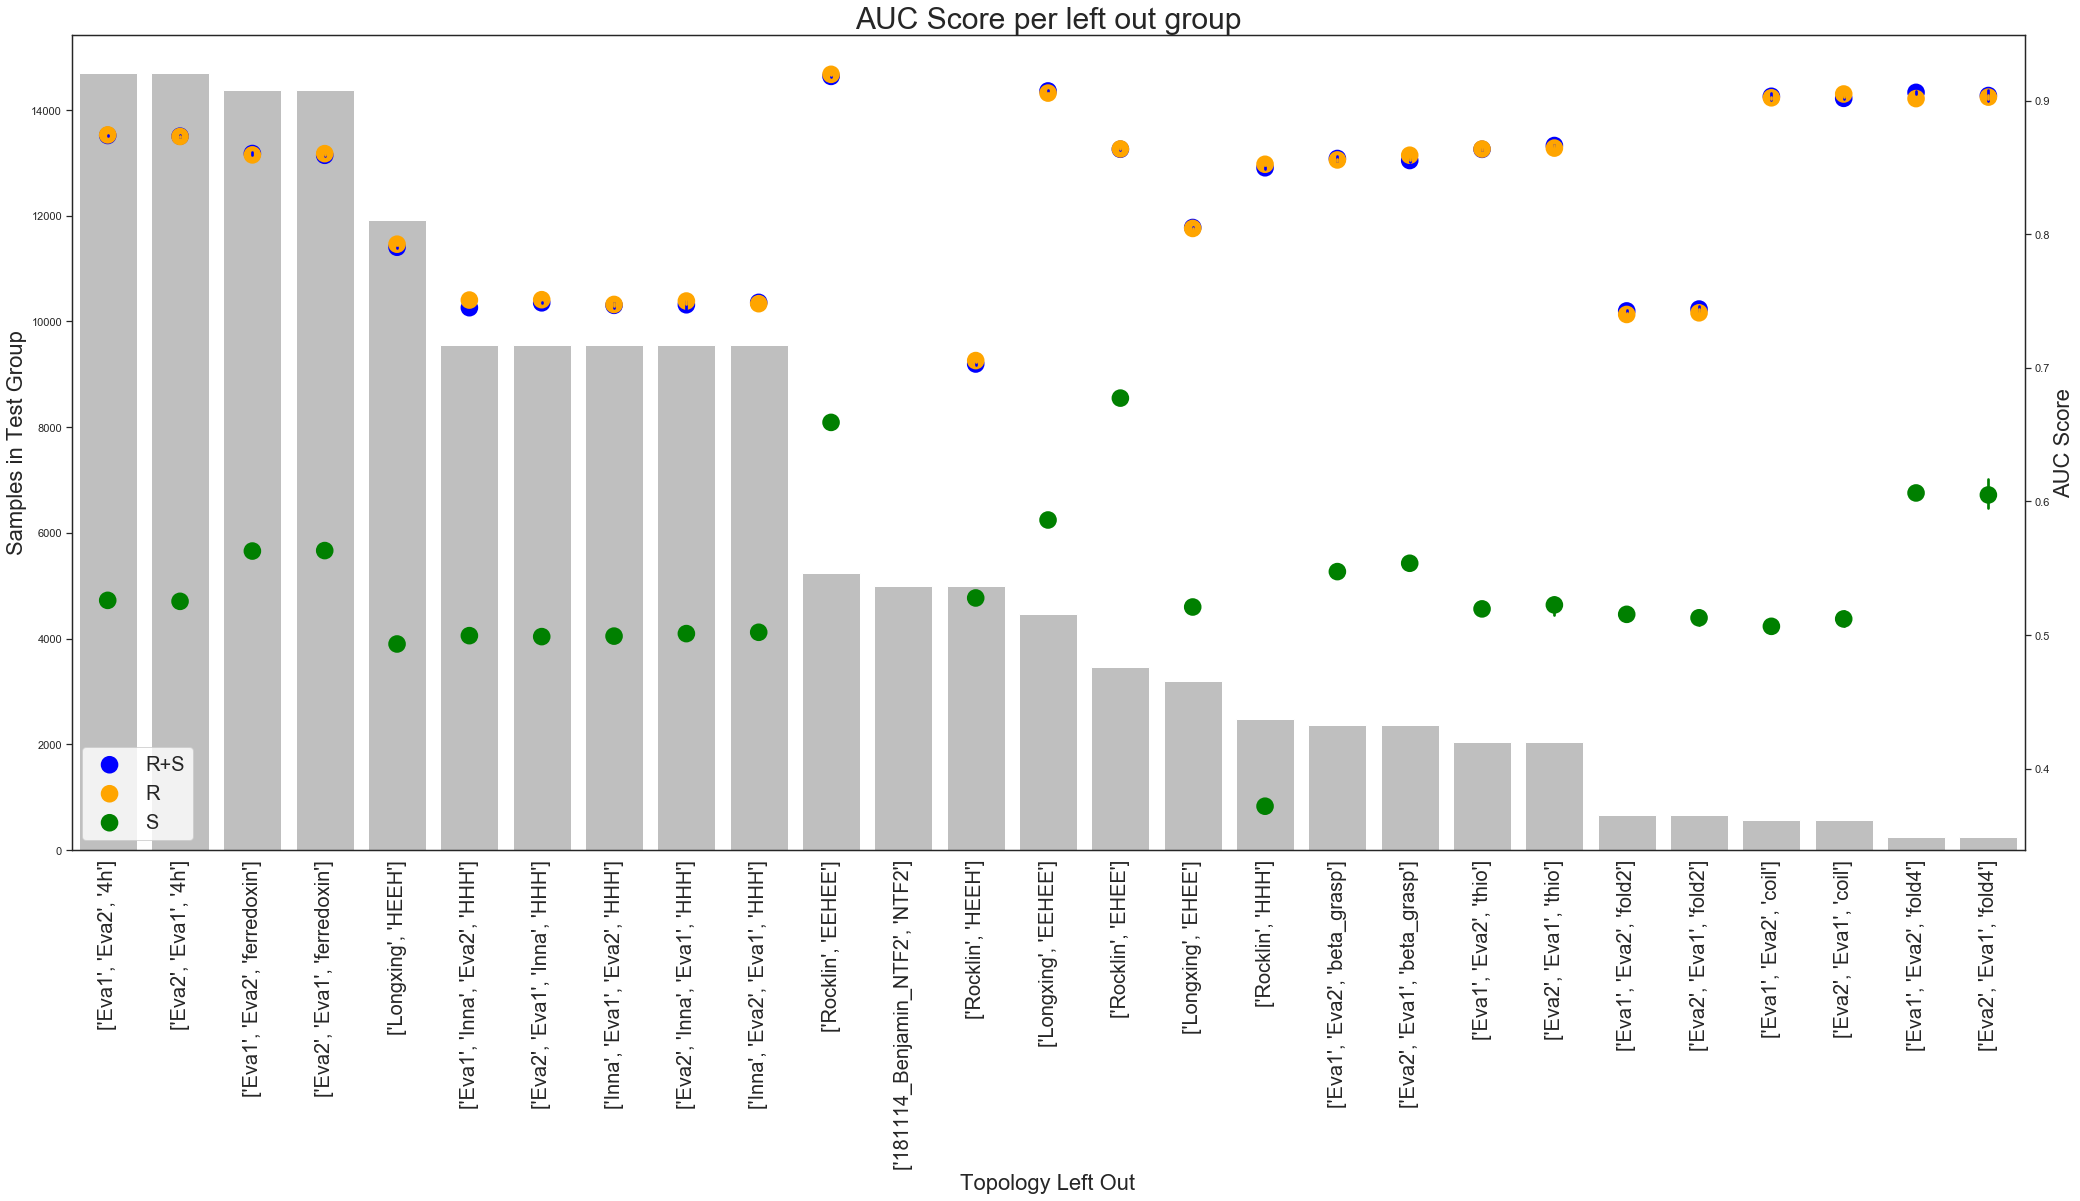

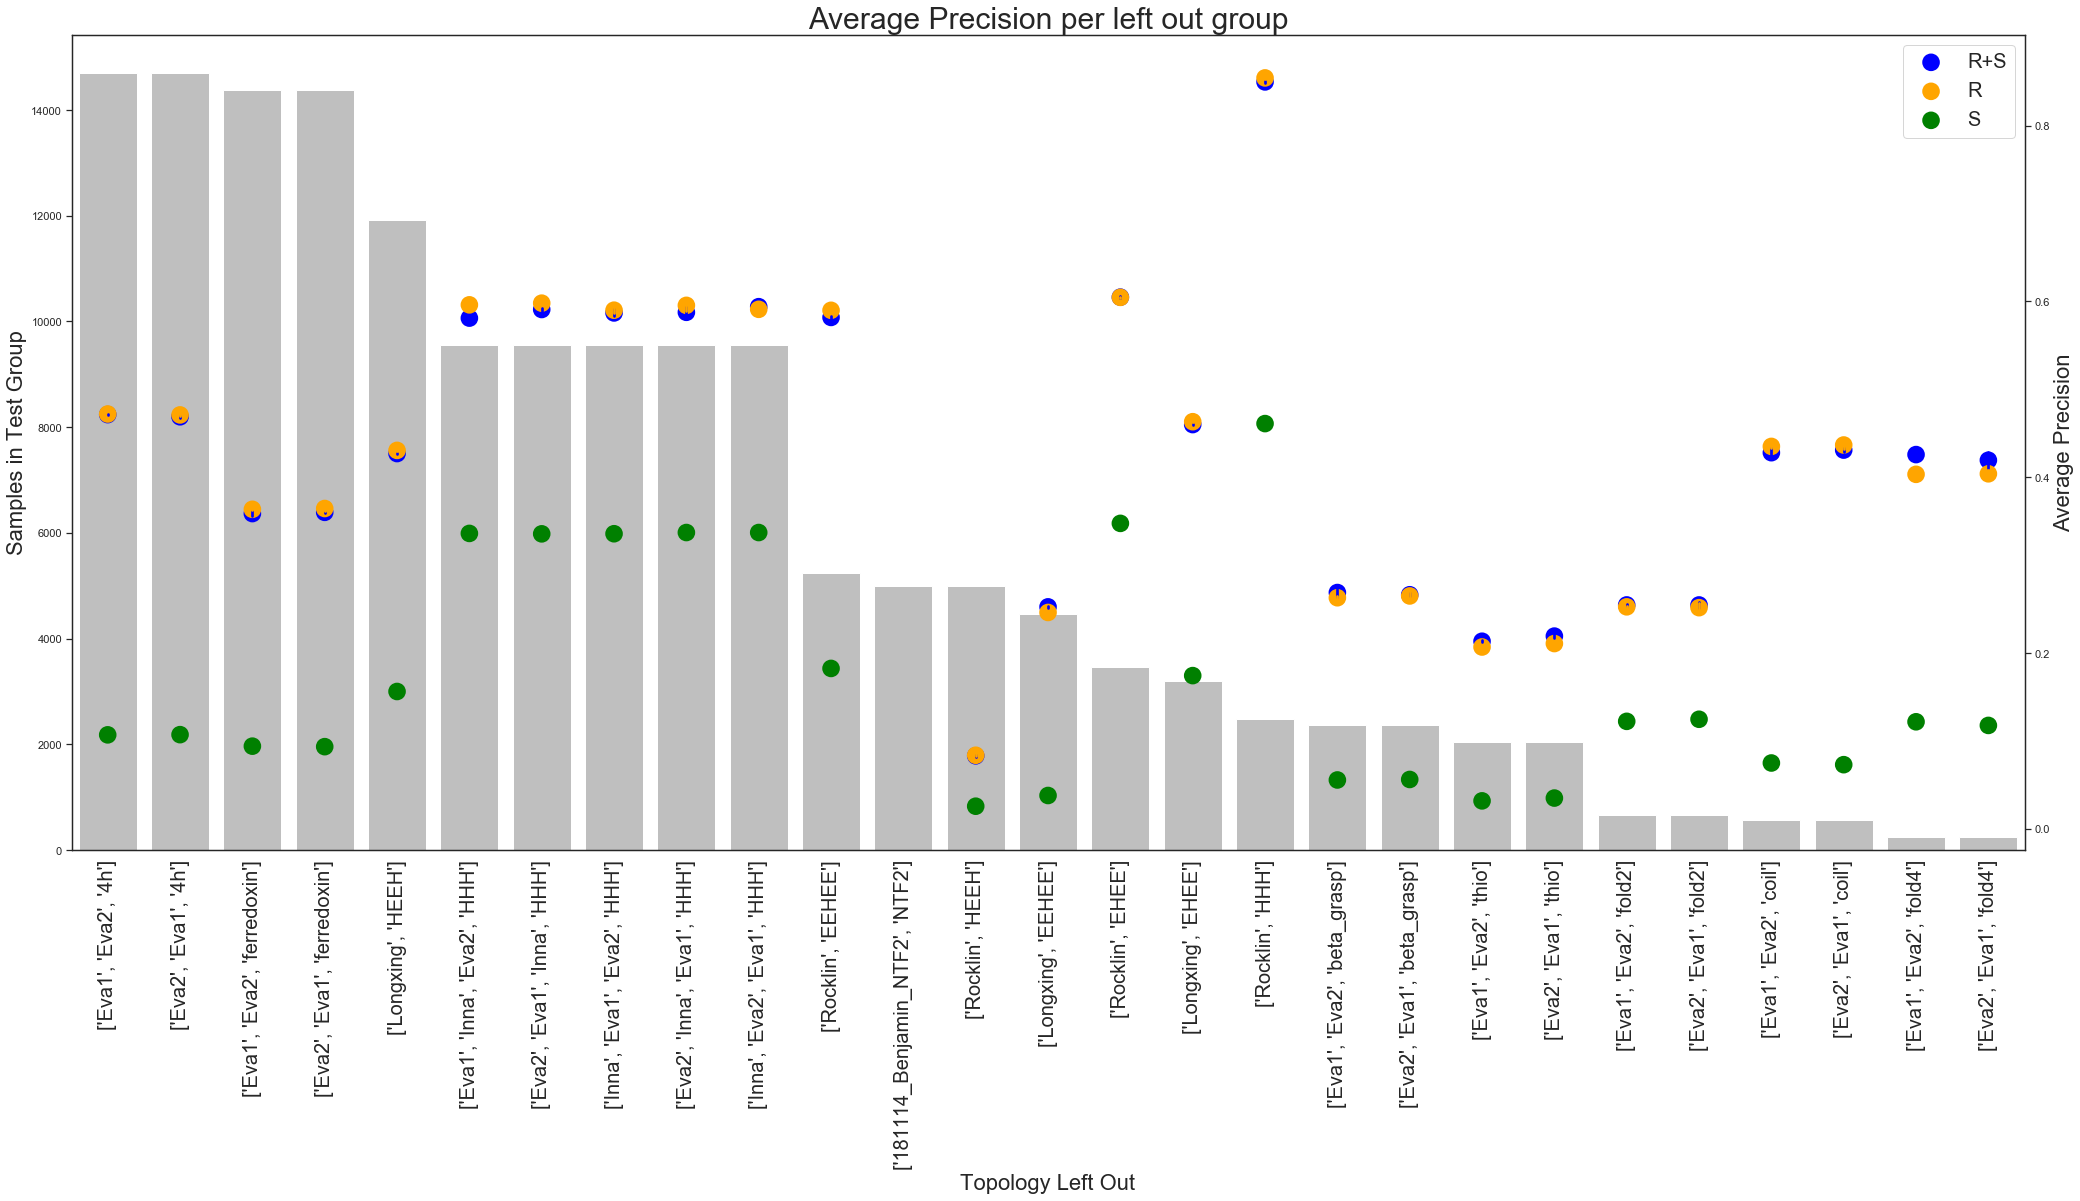

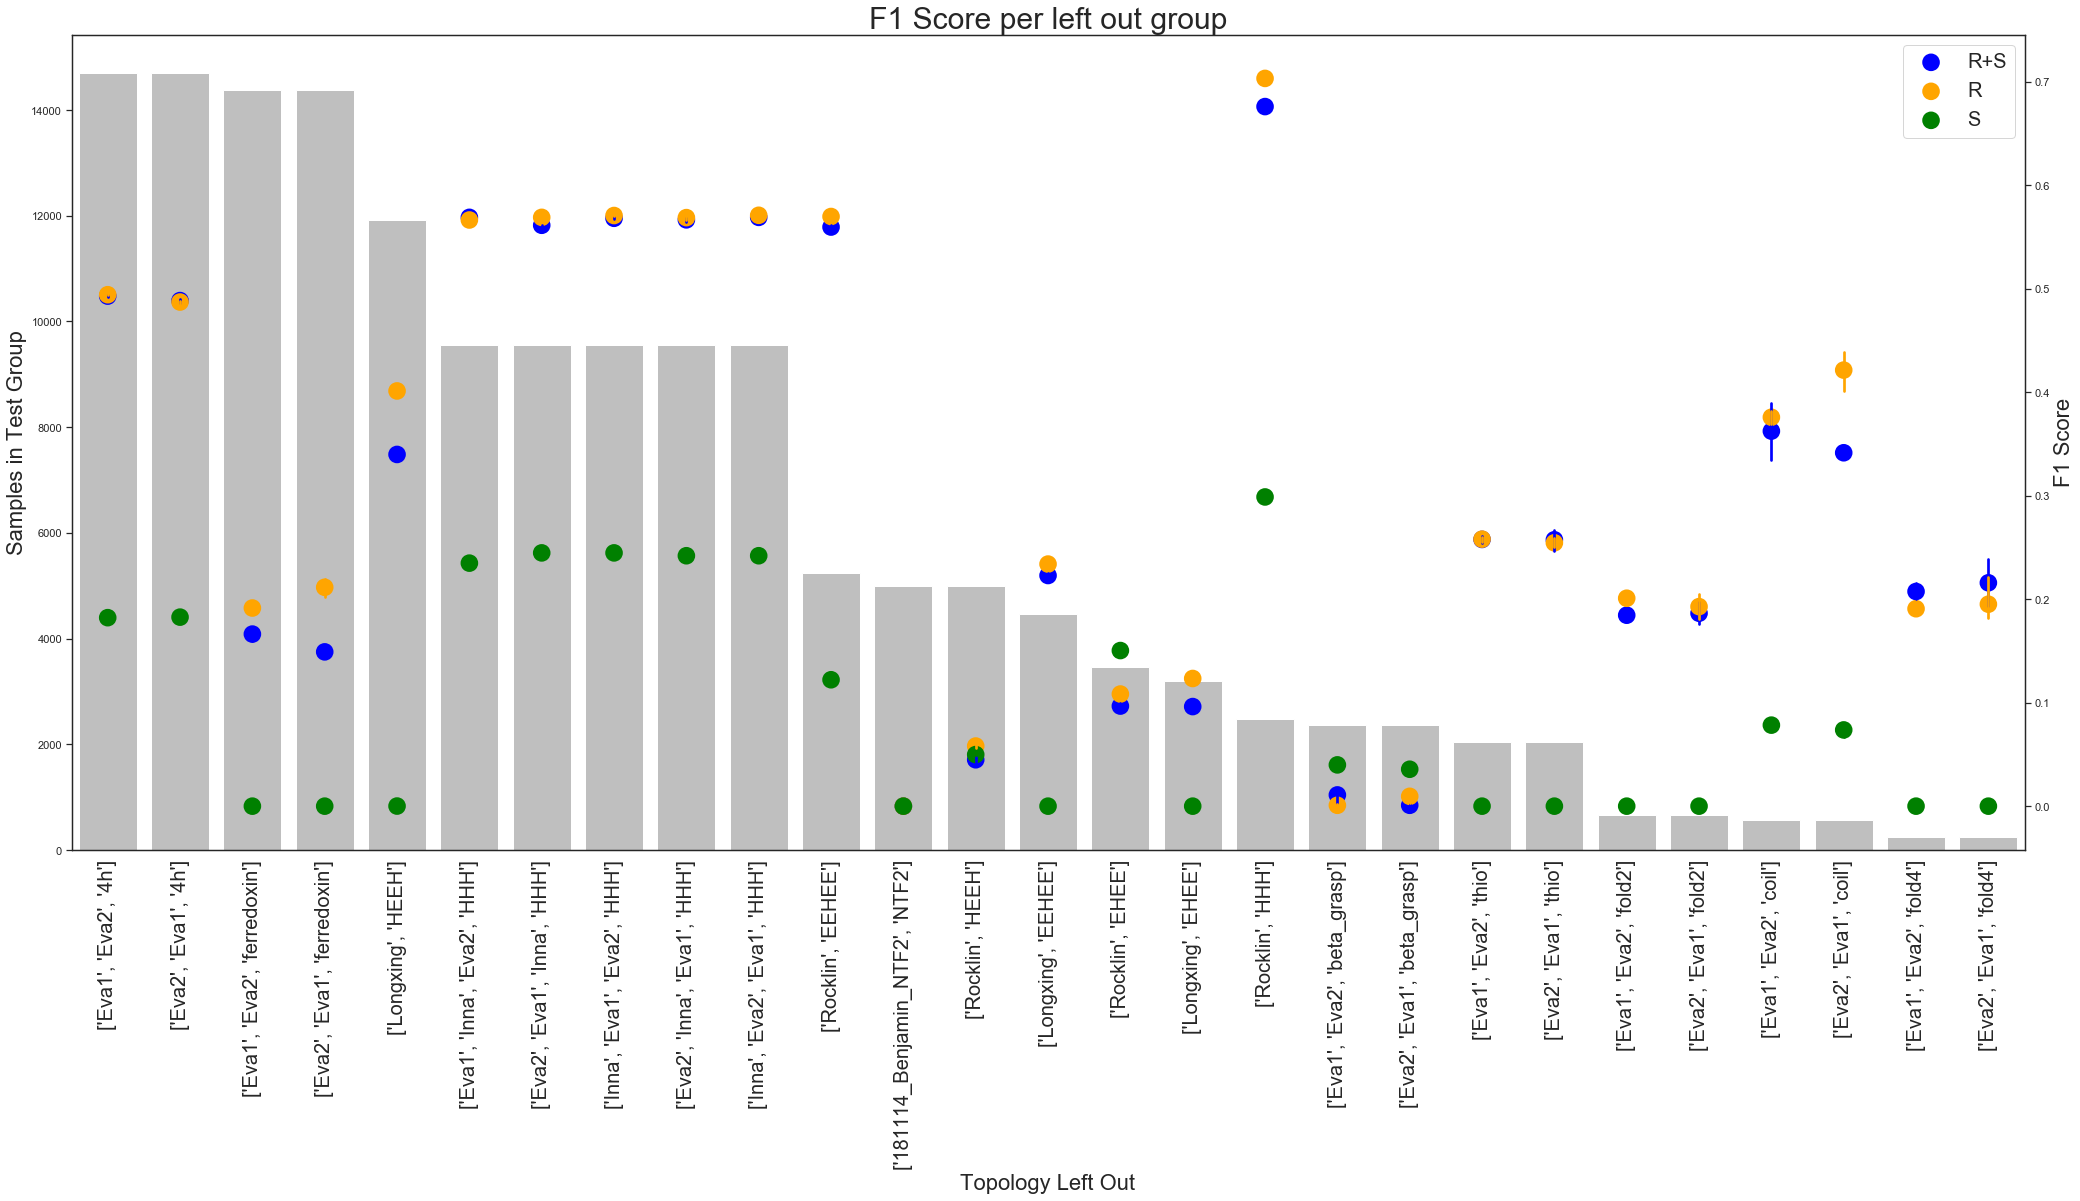

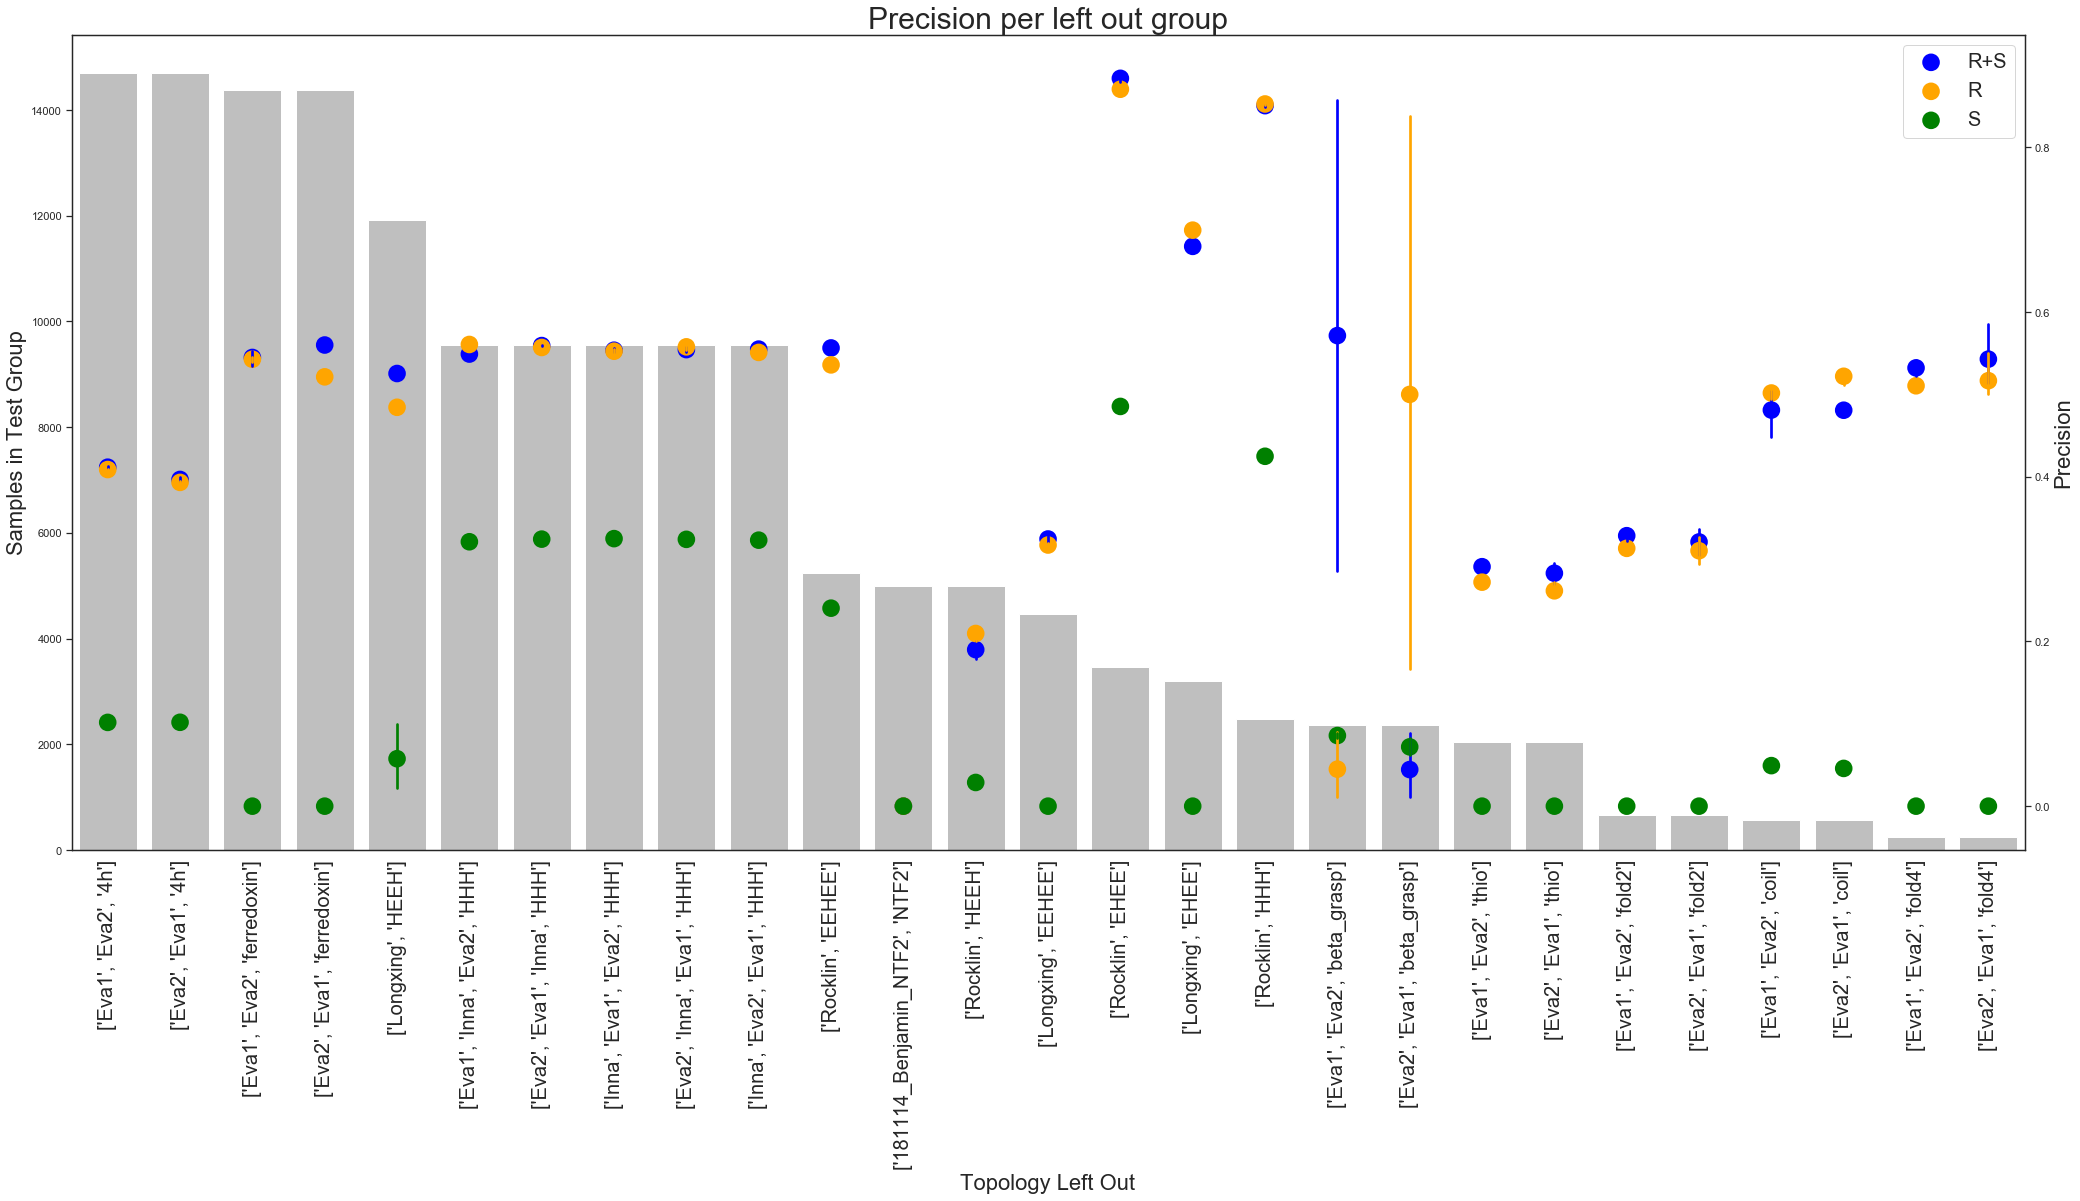

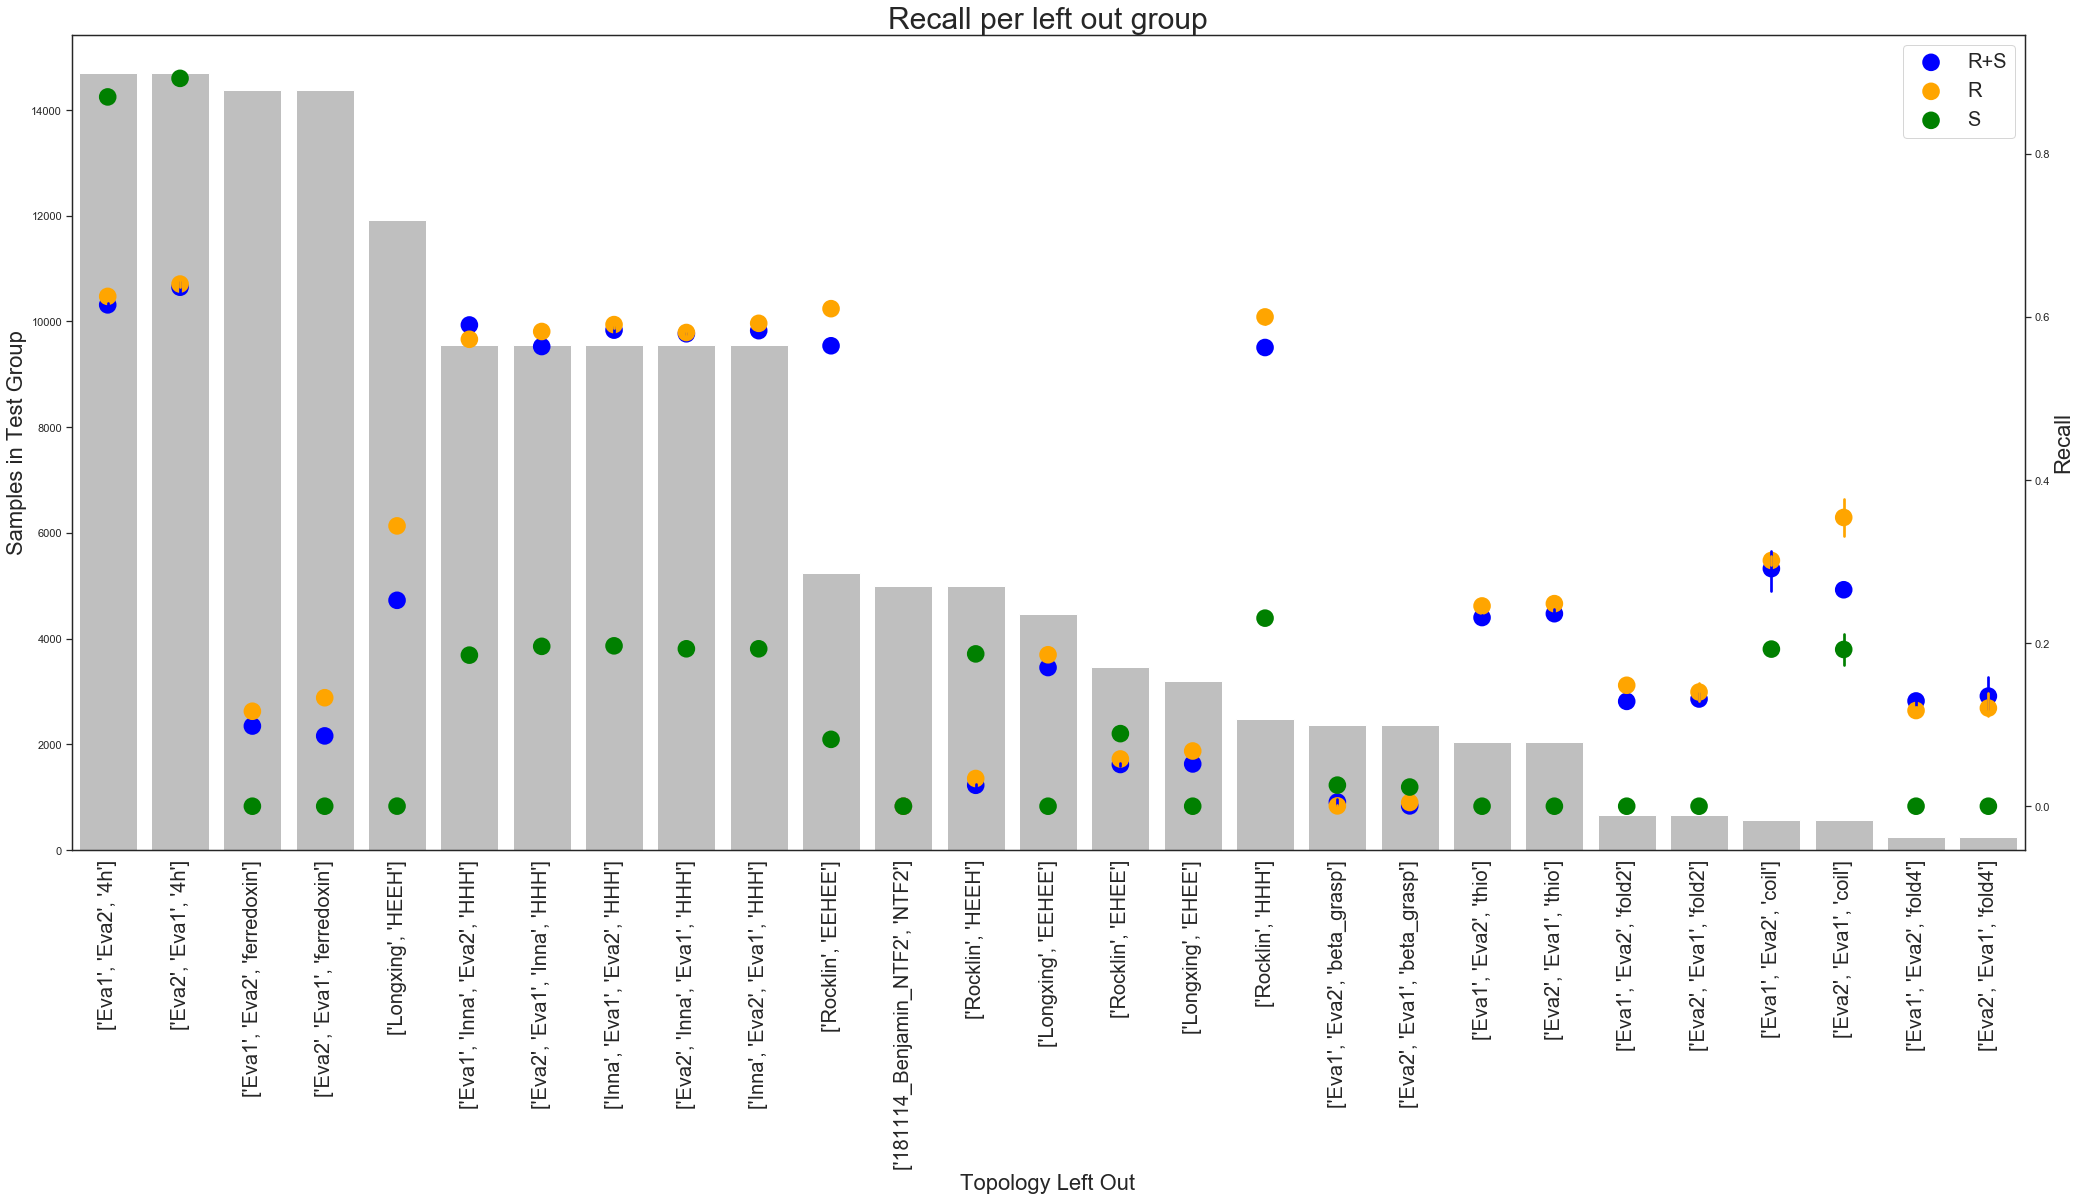

In [9]:
overall_results(
    file_path="./data/loo_detailed_classification_leaderboard.html",
    loo_run=True,
    topology_run=False,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='clf'
               )

### Regressor Results

Printing number of instances per group:
['Longxing', 'EHEE']               3
['Rocklin', 'HHH']                 3
['Longxing', 'EEHEE']              3
['Rocklin', 'EEHEE']               3
['Longxing', 'HEEH']               3
['Rocklin', 'HEEH']                3
['Rocklin', 'EHEE']                3
['Eva1', 'Eva2', 'fold2']          2
['Eva1', 'Eva2', 'thio']           2
['Eva1', 'Eva2', '4h']             2
['Inna', 'Eva1', 'Eva2', 'HHH']    2
['Eva1', 'Eva2', 'fold4']          2
['Eva1', 'Eva2', 'ferredoxin']     2
['Eva1', 'Eva2', 'beta_grasp']     2
['Eva1', 'Eva2', 'coil']           2
['Eva2', 'Eva1', 'beta_grasp']     1
['Eva2', 'Eva1', 'coil']           1
['Eva2', 'Eva1', 'ferredoxin']     1
['Eva2', 'Eva1', 'fold2']          1
['Eva2', 'Eva1', 'fold4']          1
['Eva2', 'Eva1', 'thio']           1
['Inna', 'Eva2', 'Eva1', 'HHH']    1
['Eva2', 'Eva1', '4h']             1
Name: Test Group, dtype: int64

Plotting Trends:


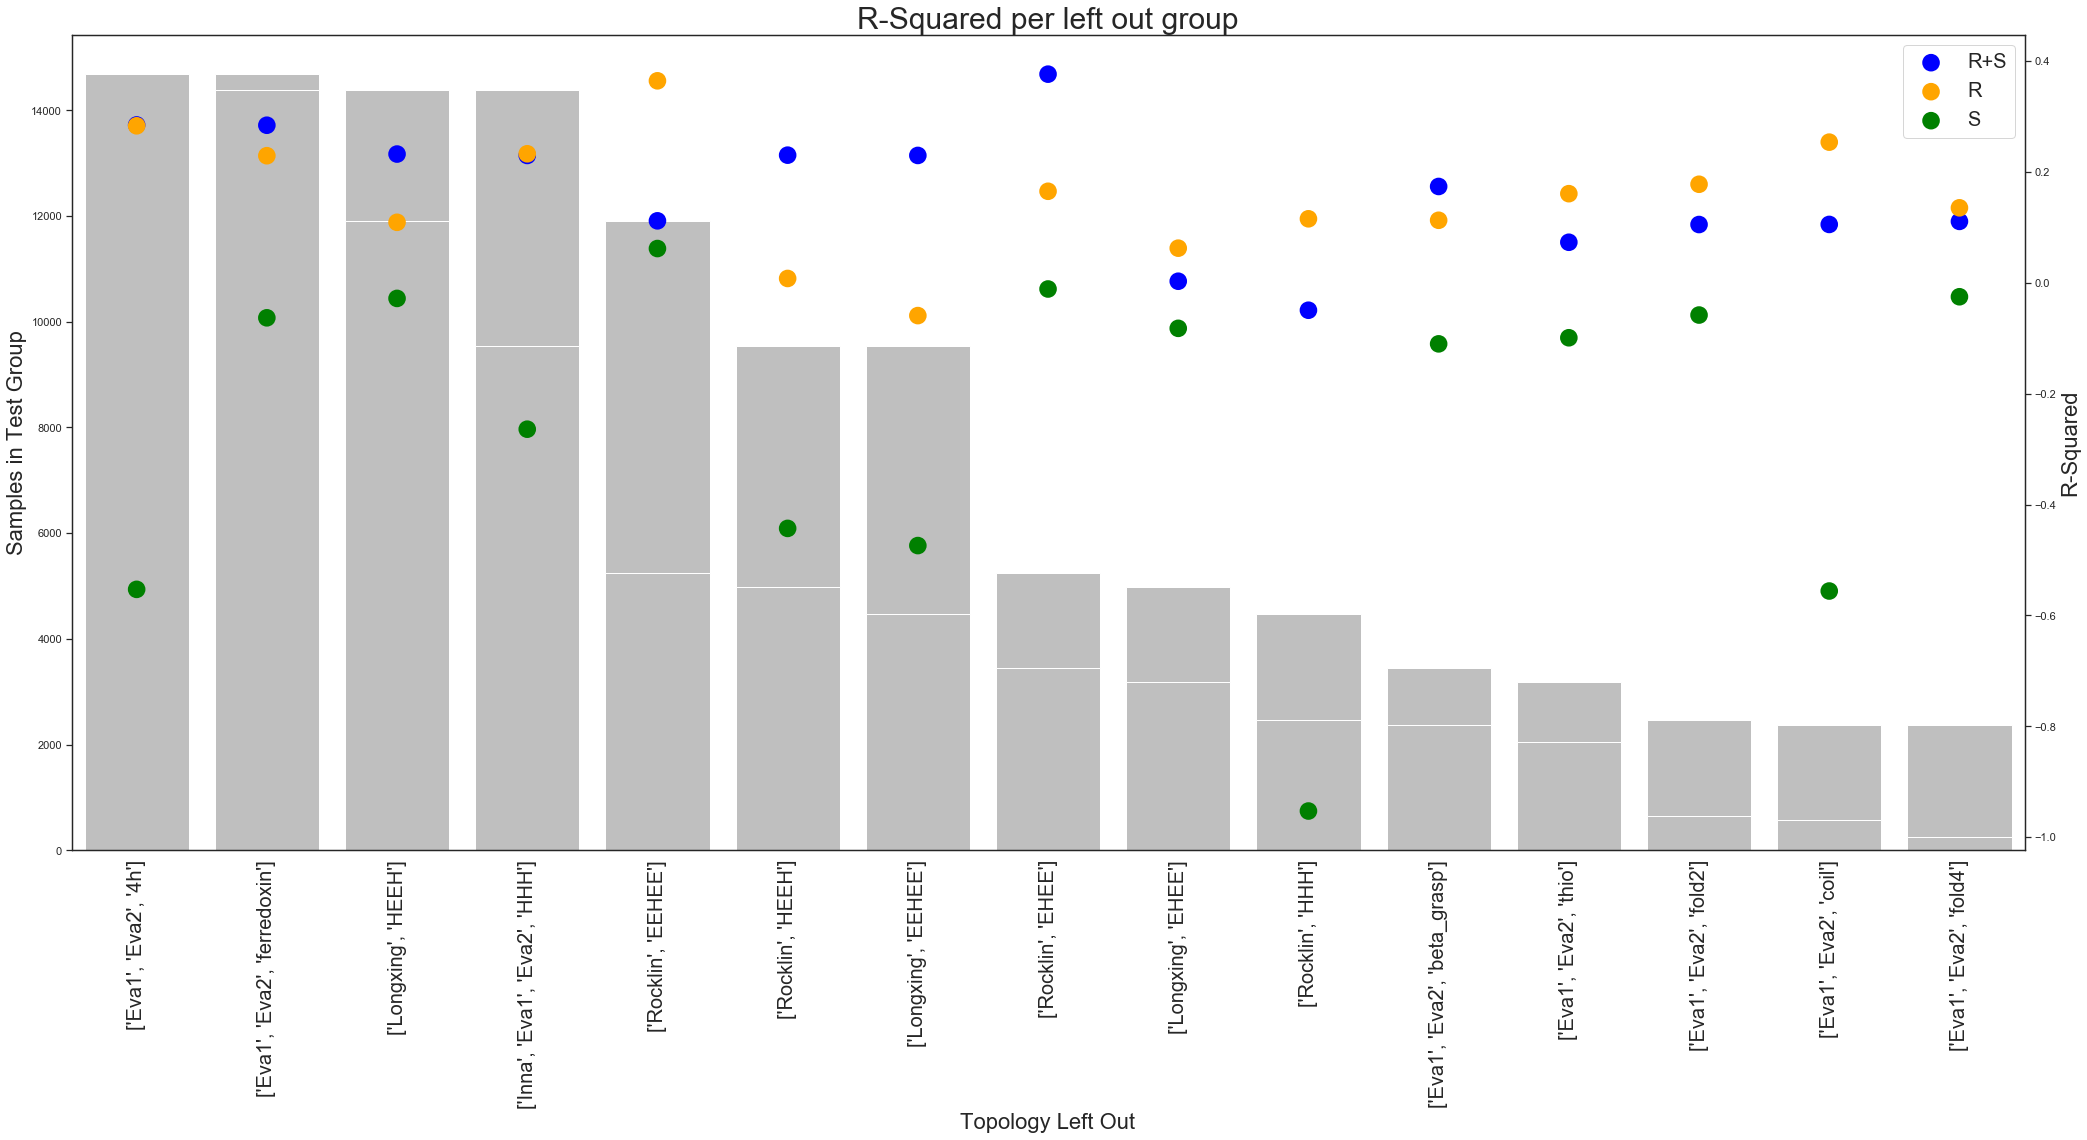

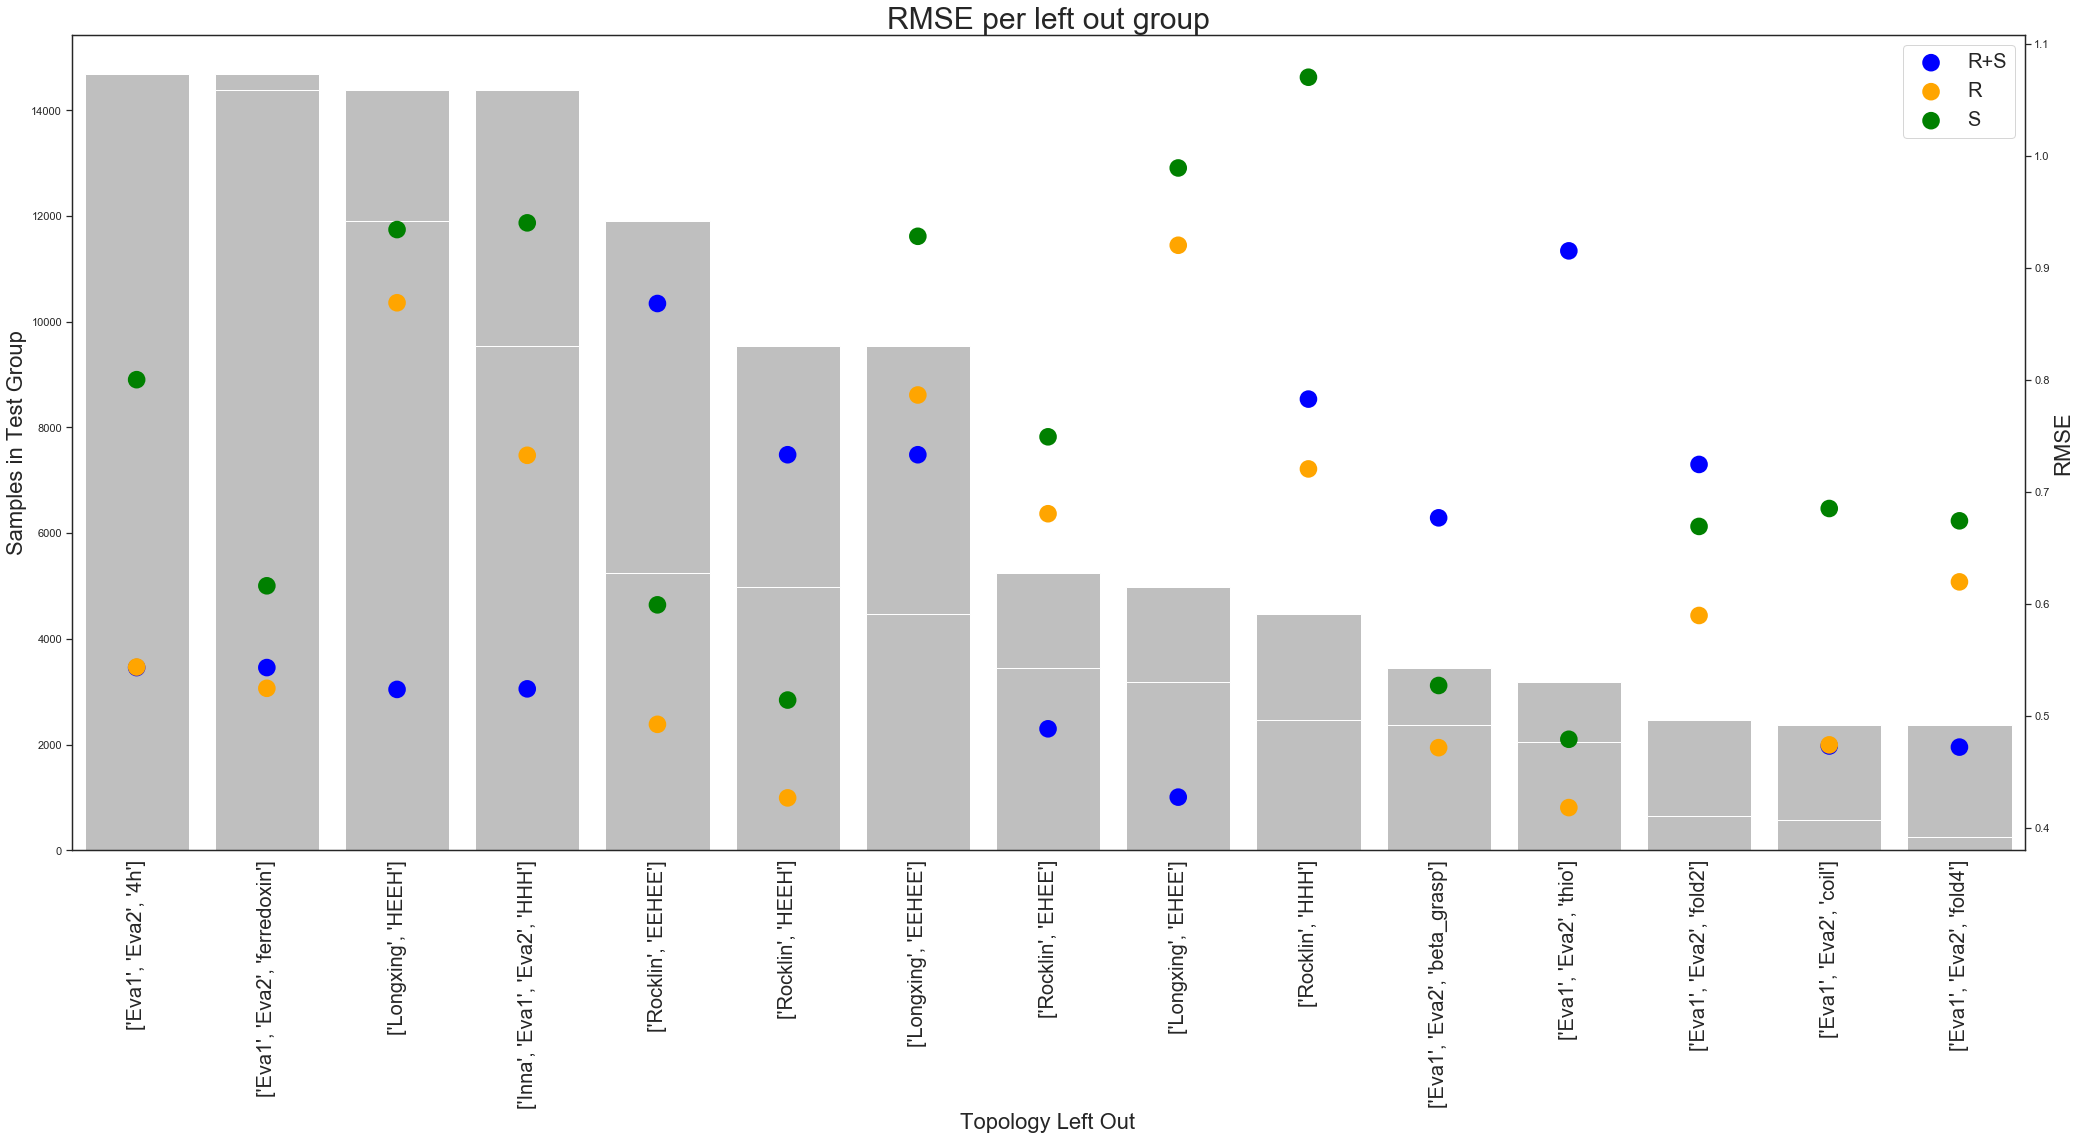

In [10]:
overall_results(
    file_path="./data/loo_detailed_regression_leaderboard.html",
    loo_run=True,
    topology_run=False,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='rgr')

In [11]:
# load leaderboard with LOO Runs results
loo_leaderboard_rgr = pd.read_html("./data/loo_detailed_regression_leaderboard.html")[0]

# create a dataframe that contains R+S data
loo_rgr_rs = loo_leaderboard_rgr[loo_leaderboard_rgr['Data and Split Description']=='RS']
# create a dataframe that contains R data
loo_rgr_r = loo_leaderboard_rgr[loo_leaderboard_rgr['Data and Split Description']=='R']
# create a dataframe that contains S data
loo_rgr_s = loo_leaderboard_rgr[loo_leaderboard_rgr['Data and Split Description']=='S']

----------------------------

# Topology Specific Runs

**TODO**:
- explain what a topology specific run is
- highlight results from the graphs/data

--------------------------

### Classifier Results

HEEH          117
4h            117
ferredoxin    115
EEHEE         114
HHH           114
EHEE          111
coil          105
fold4         105
thio          105
fold2         105
beta_grasp    105
Name: topology, dtype: int64
Plotting Trends:


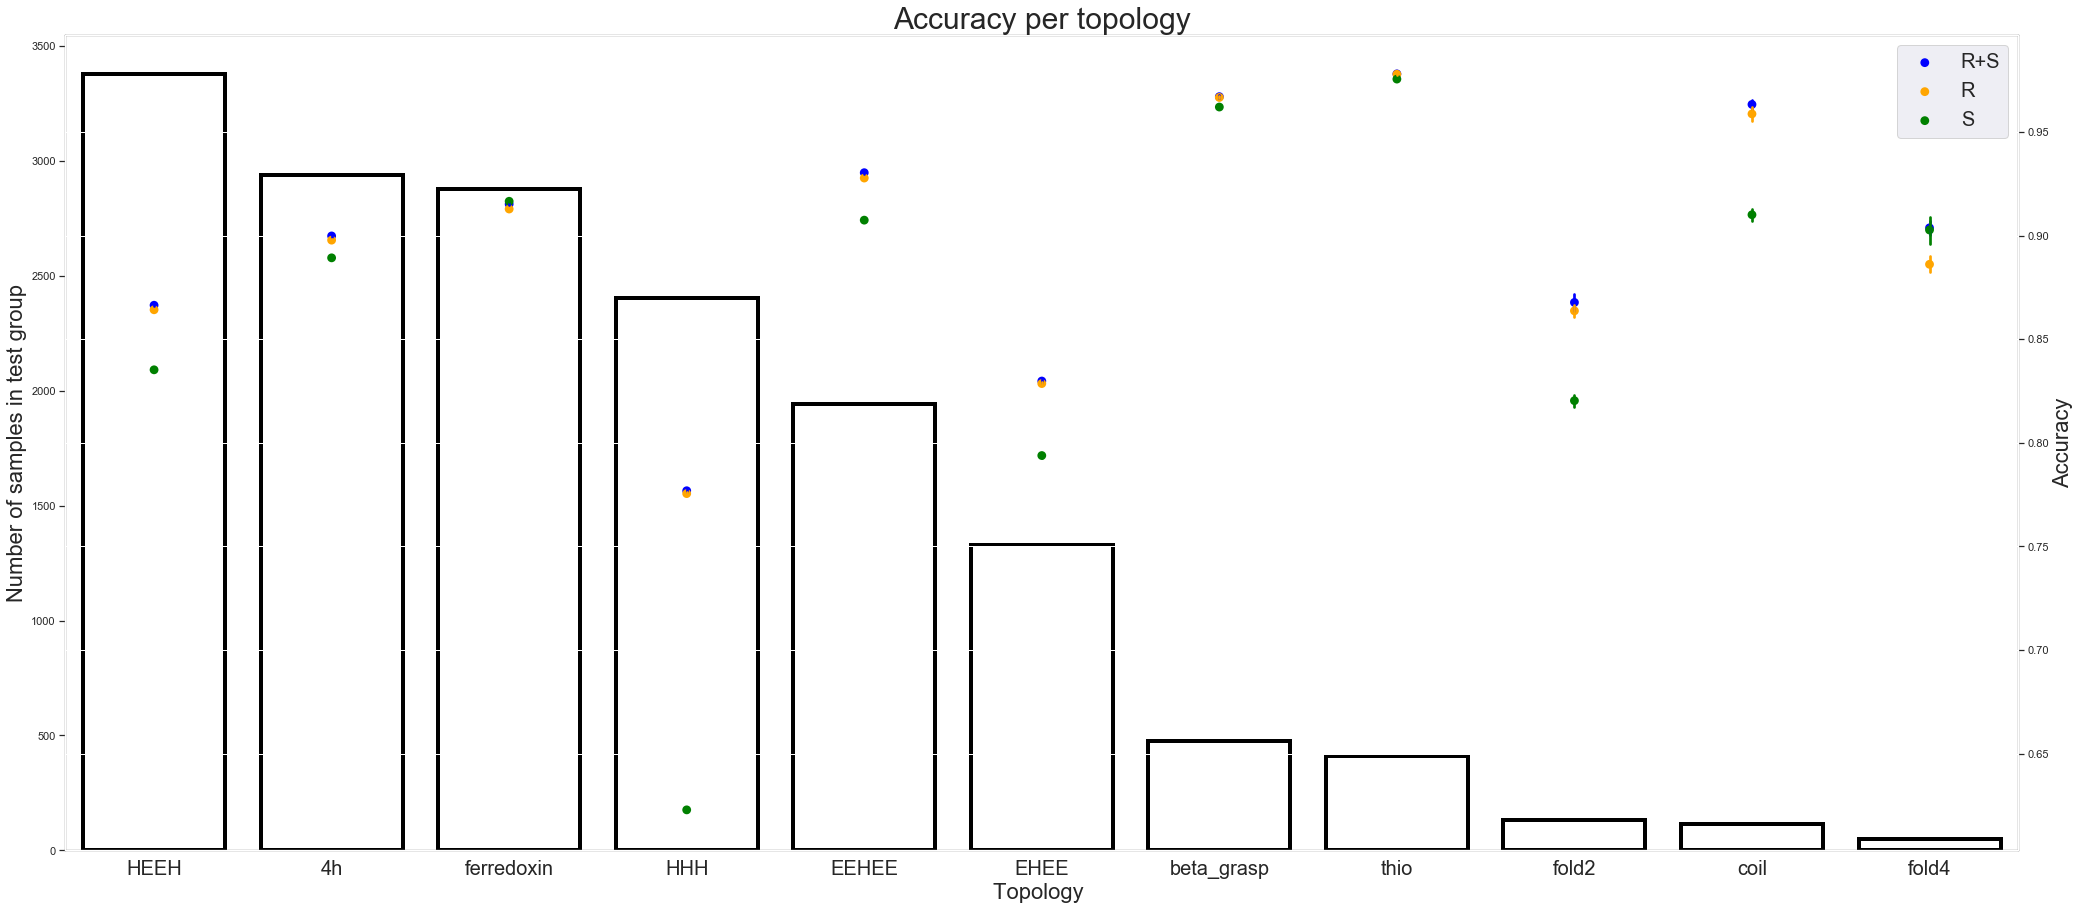

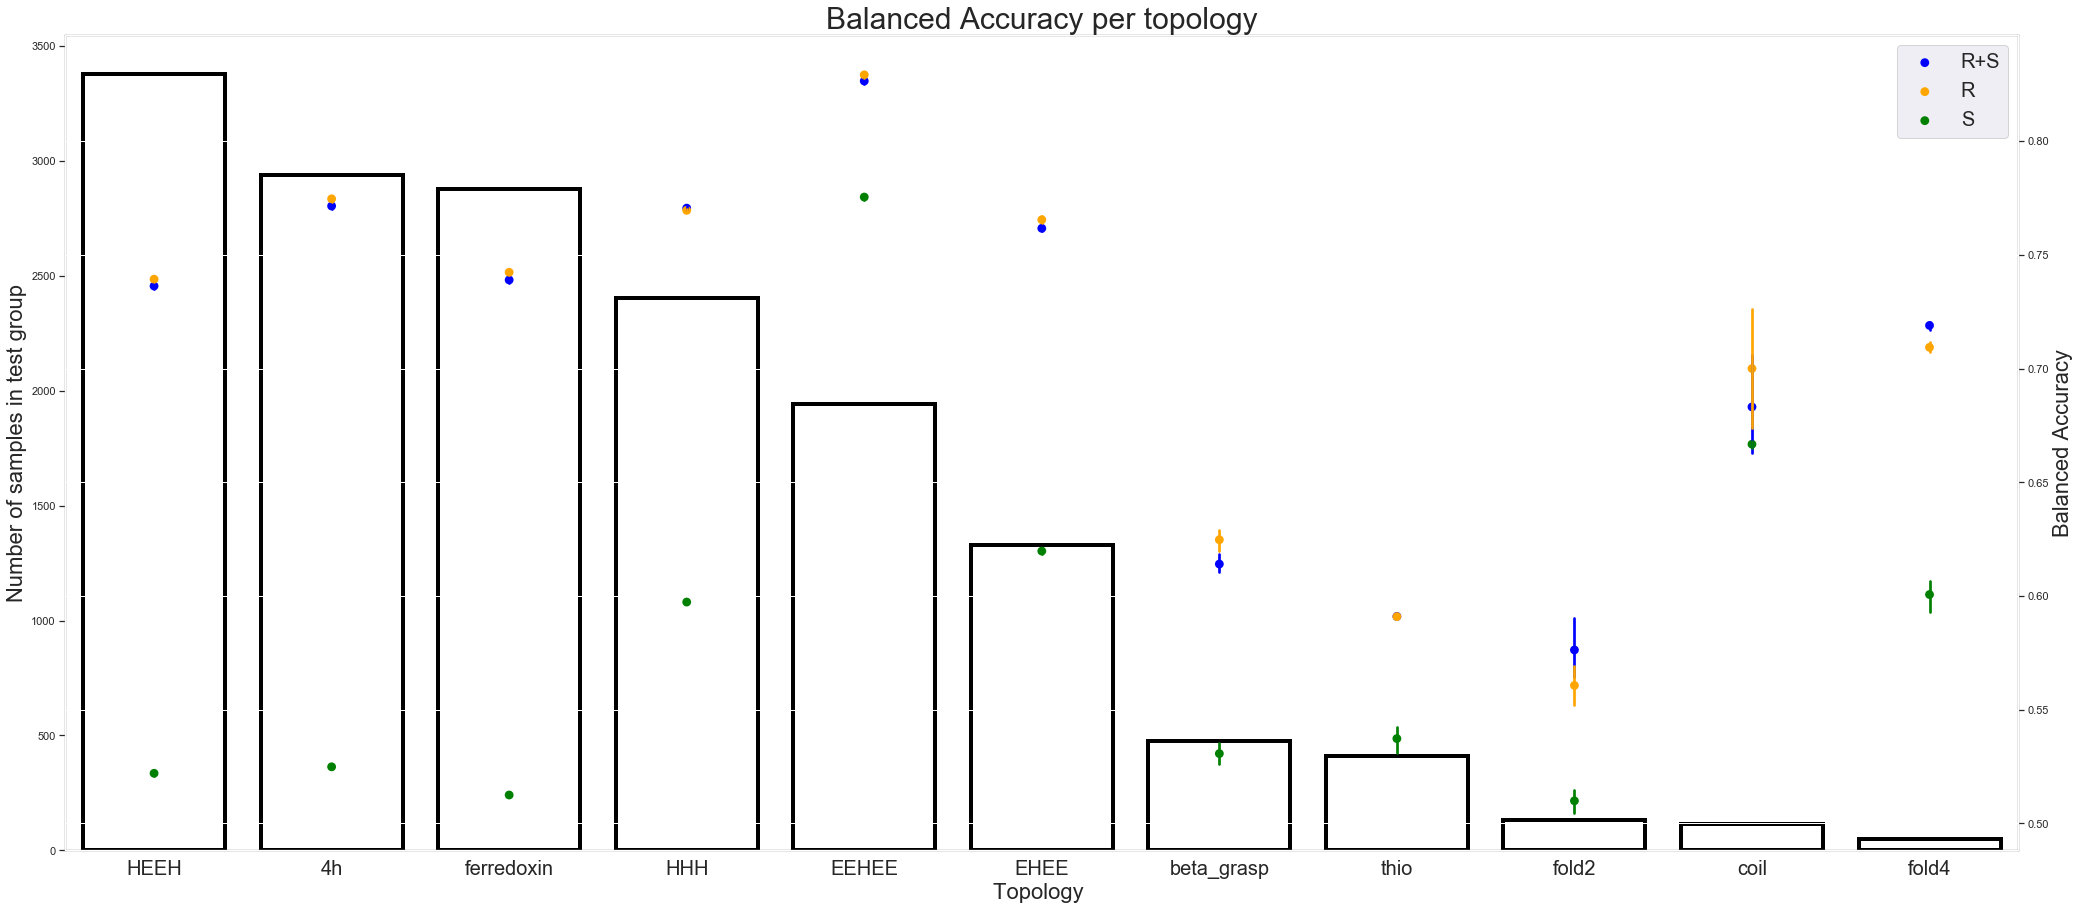

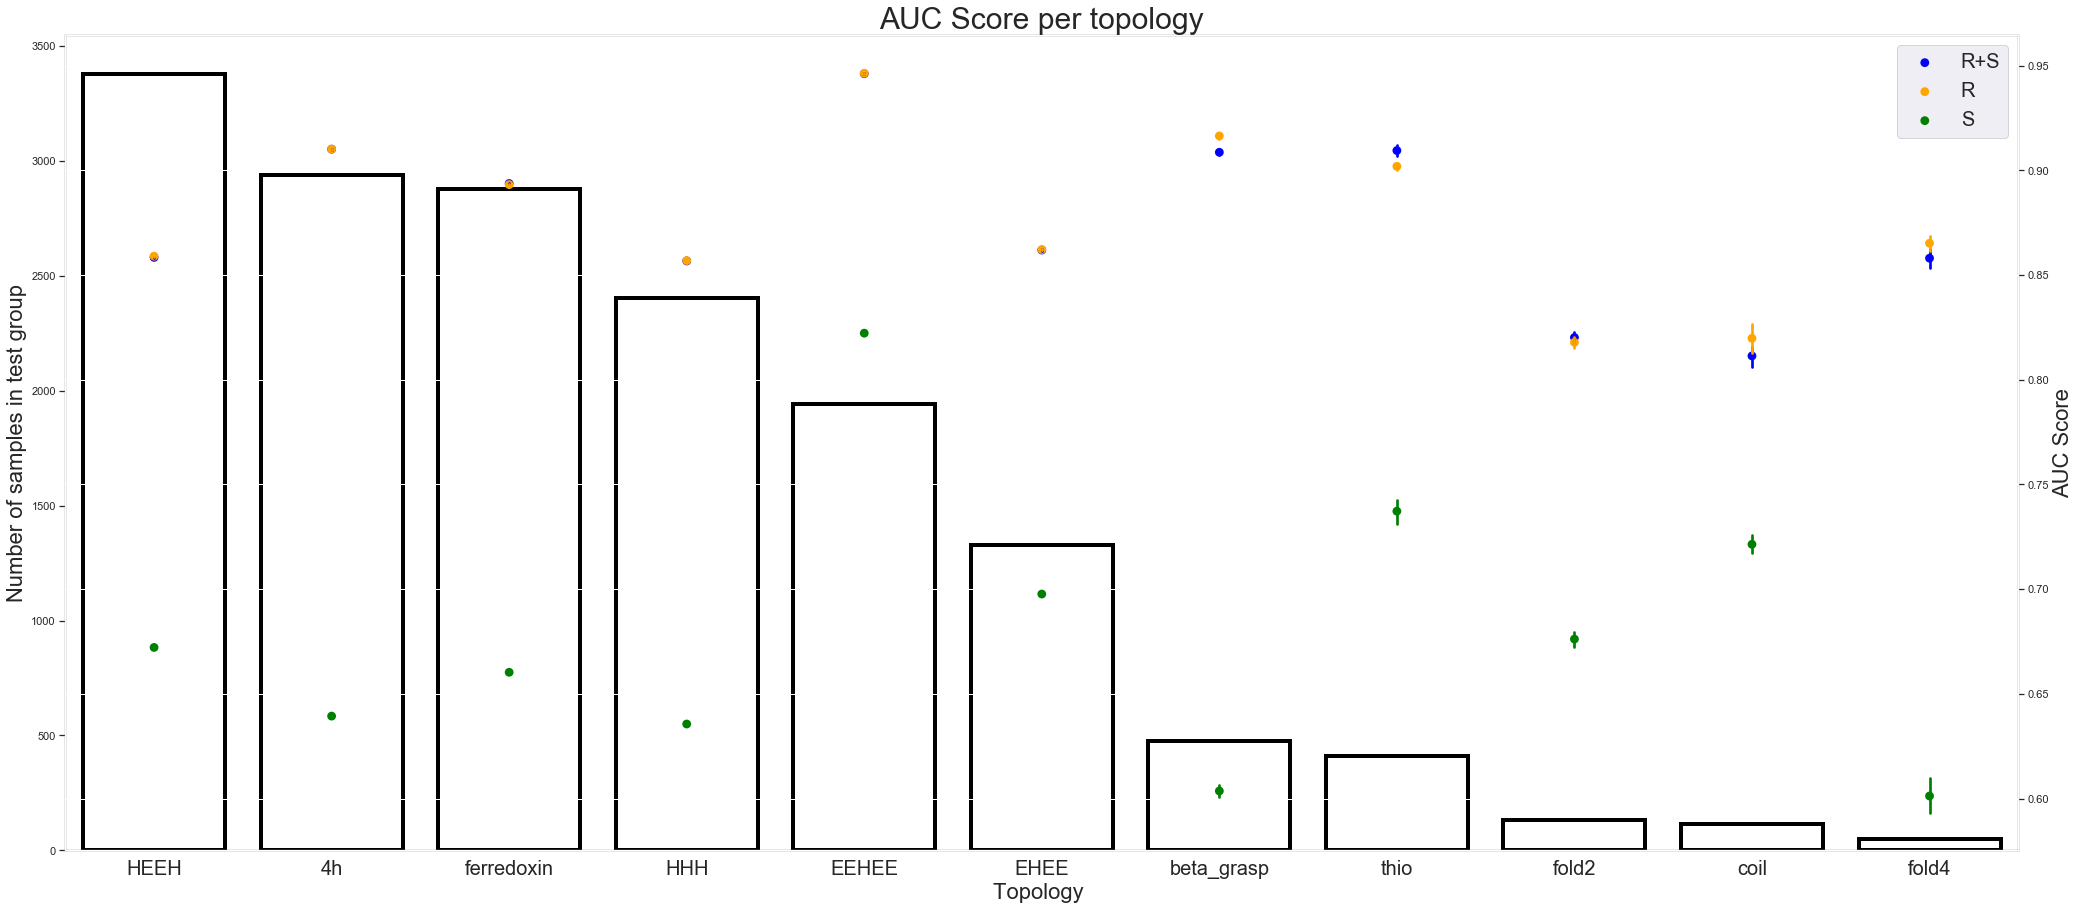

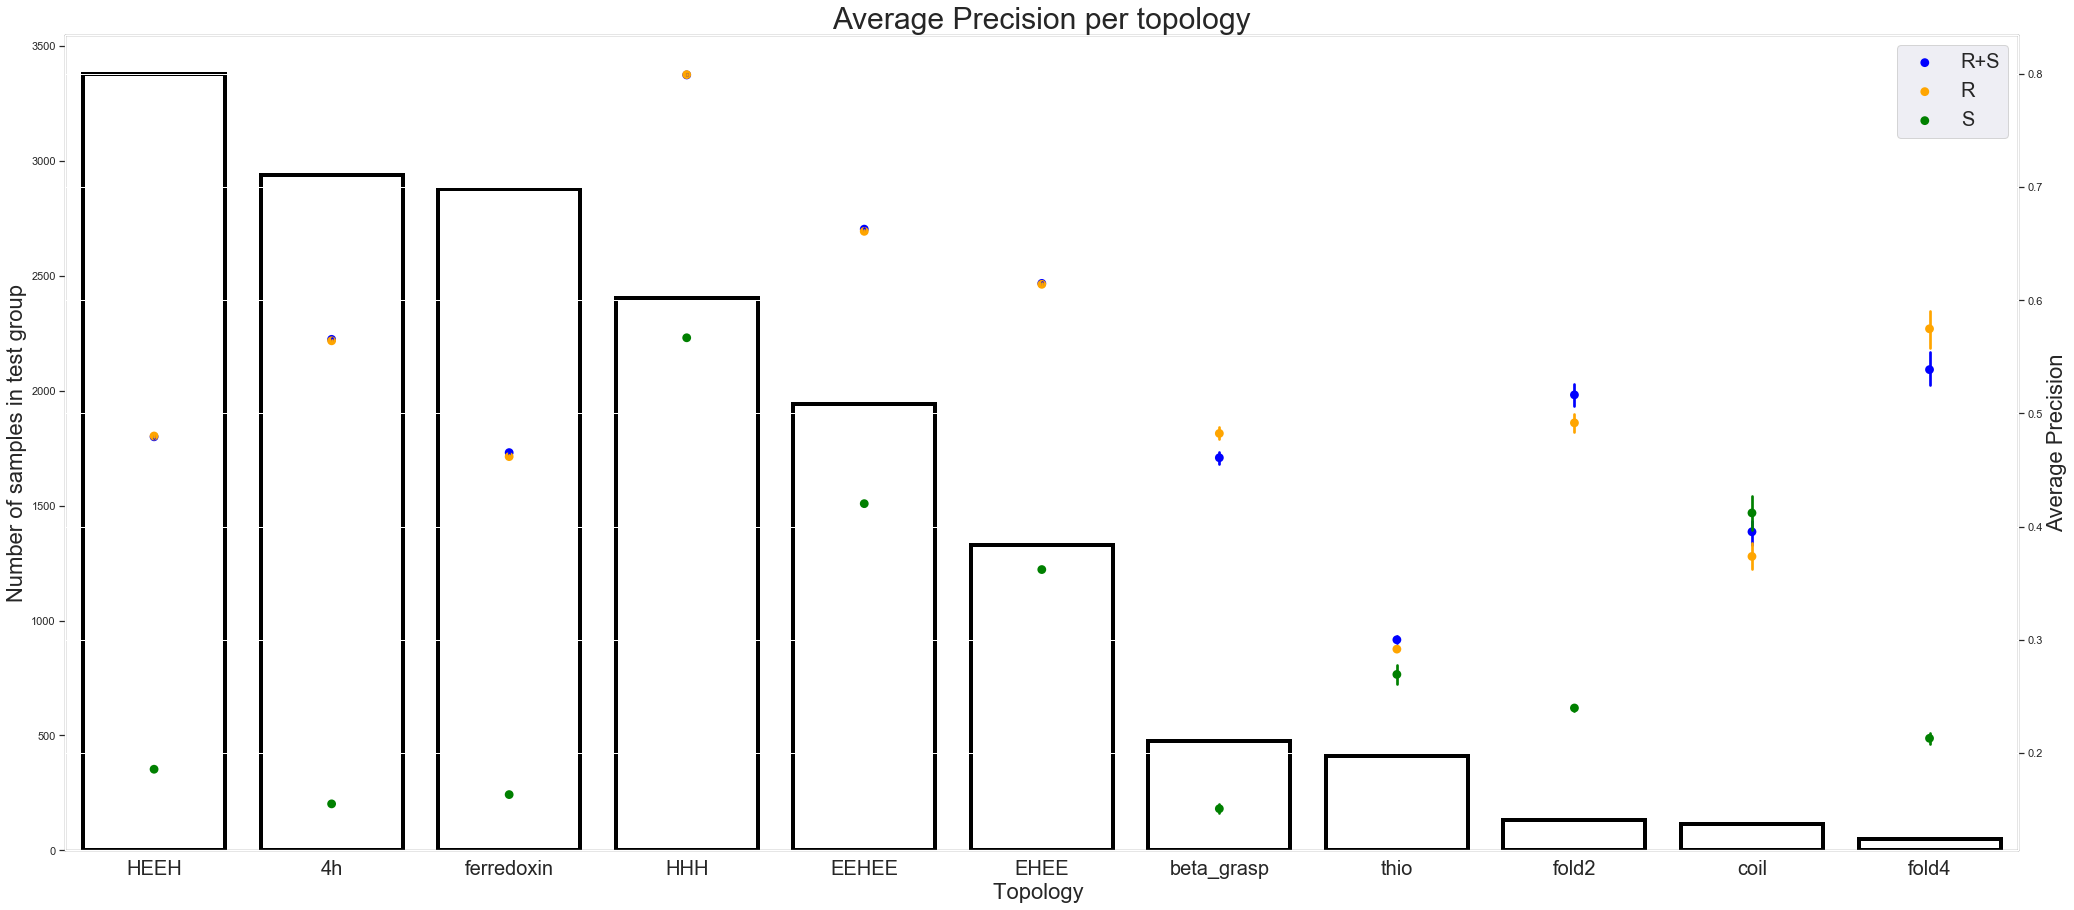

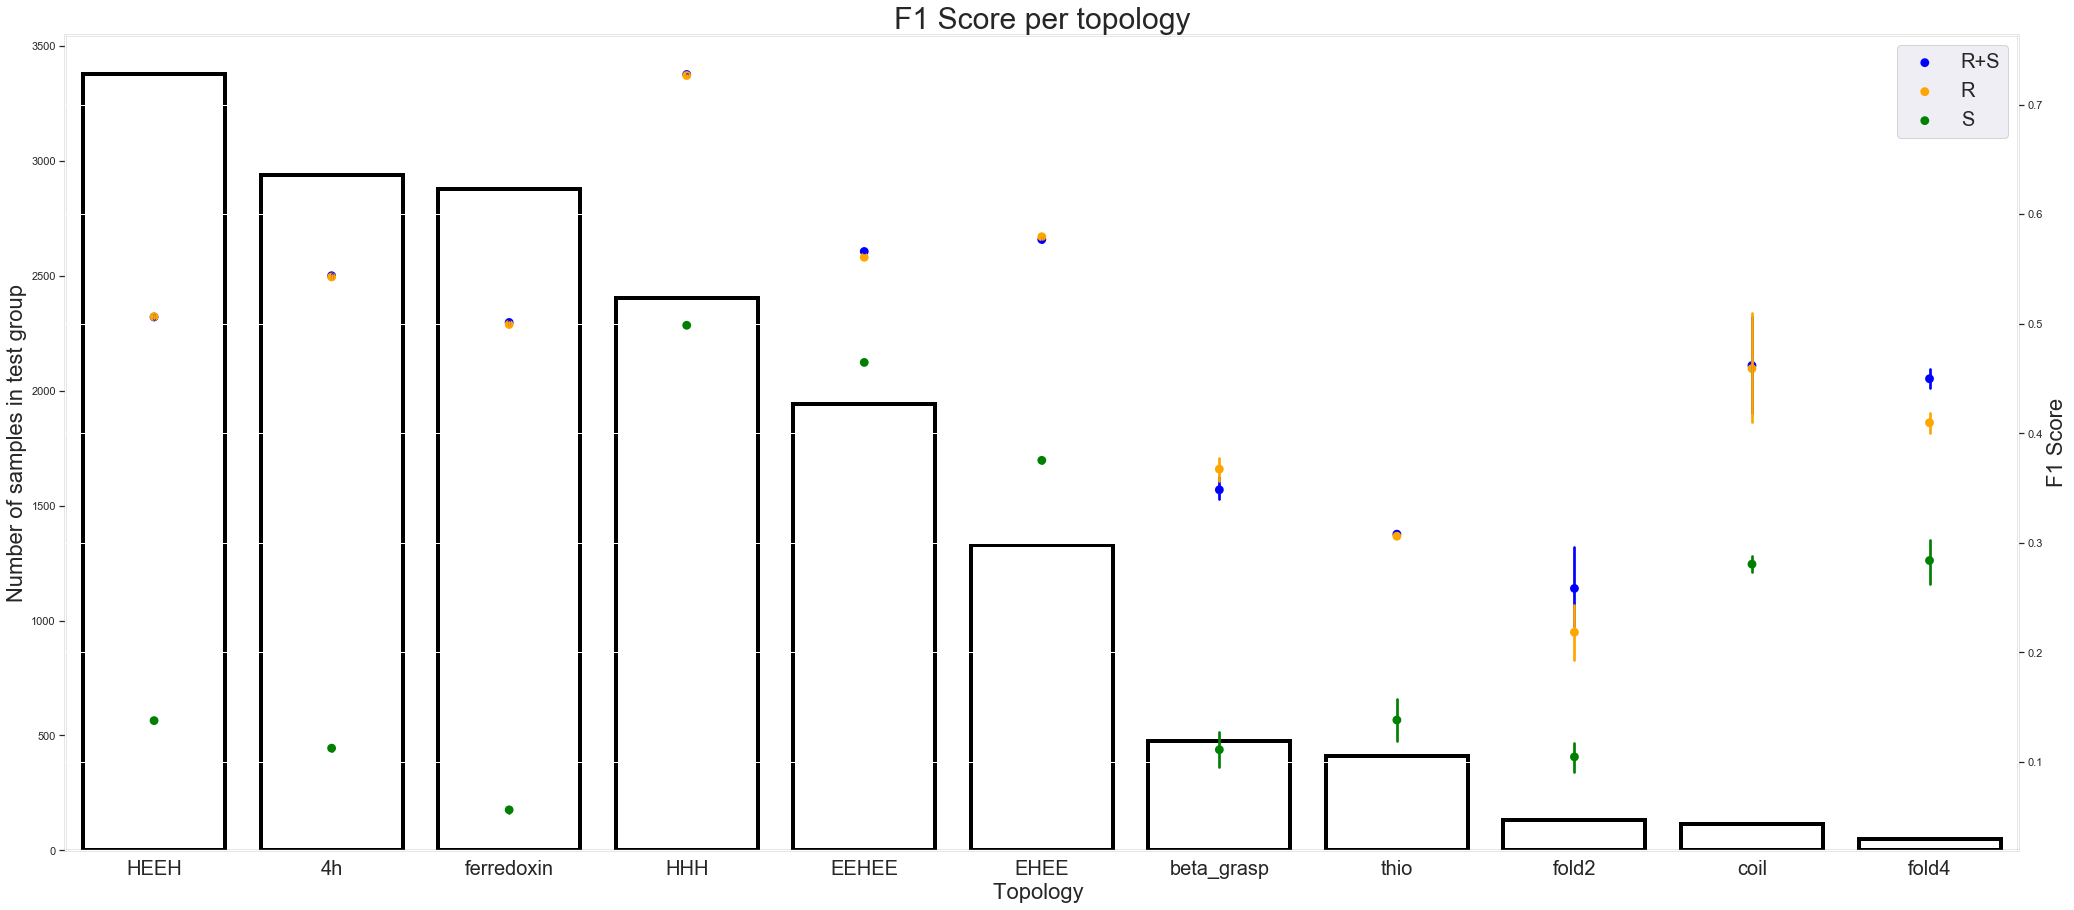

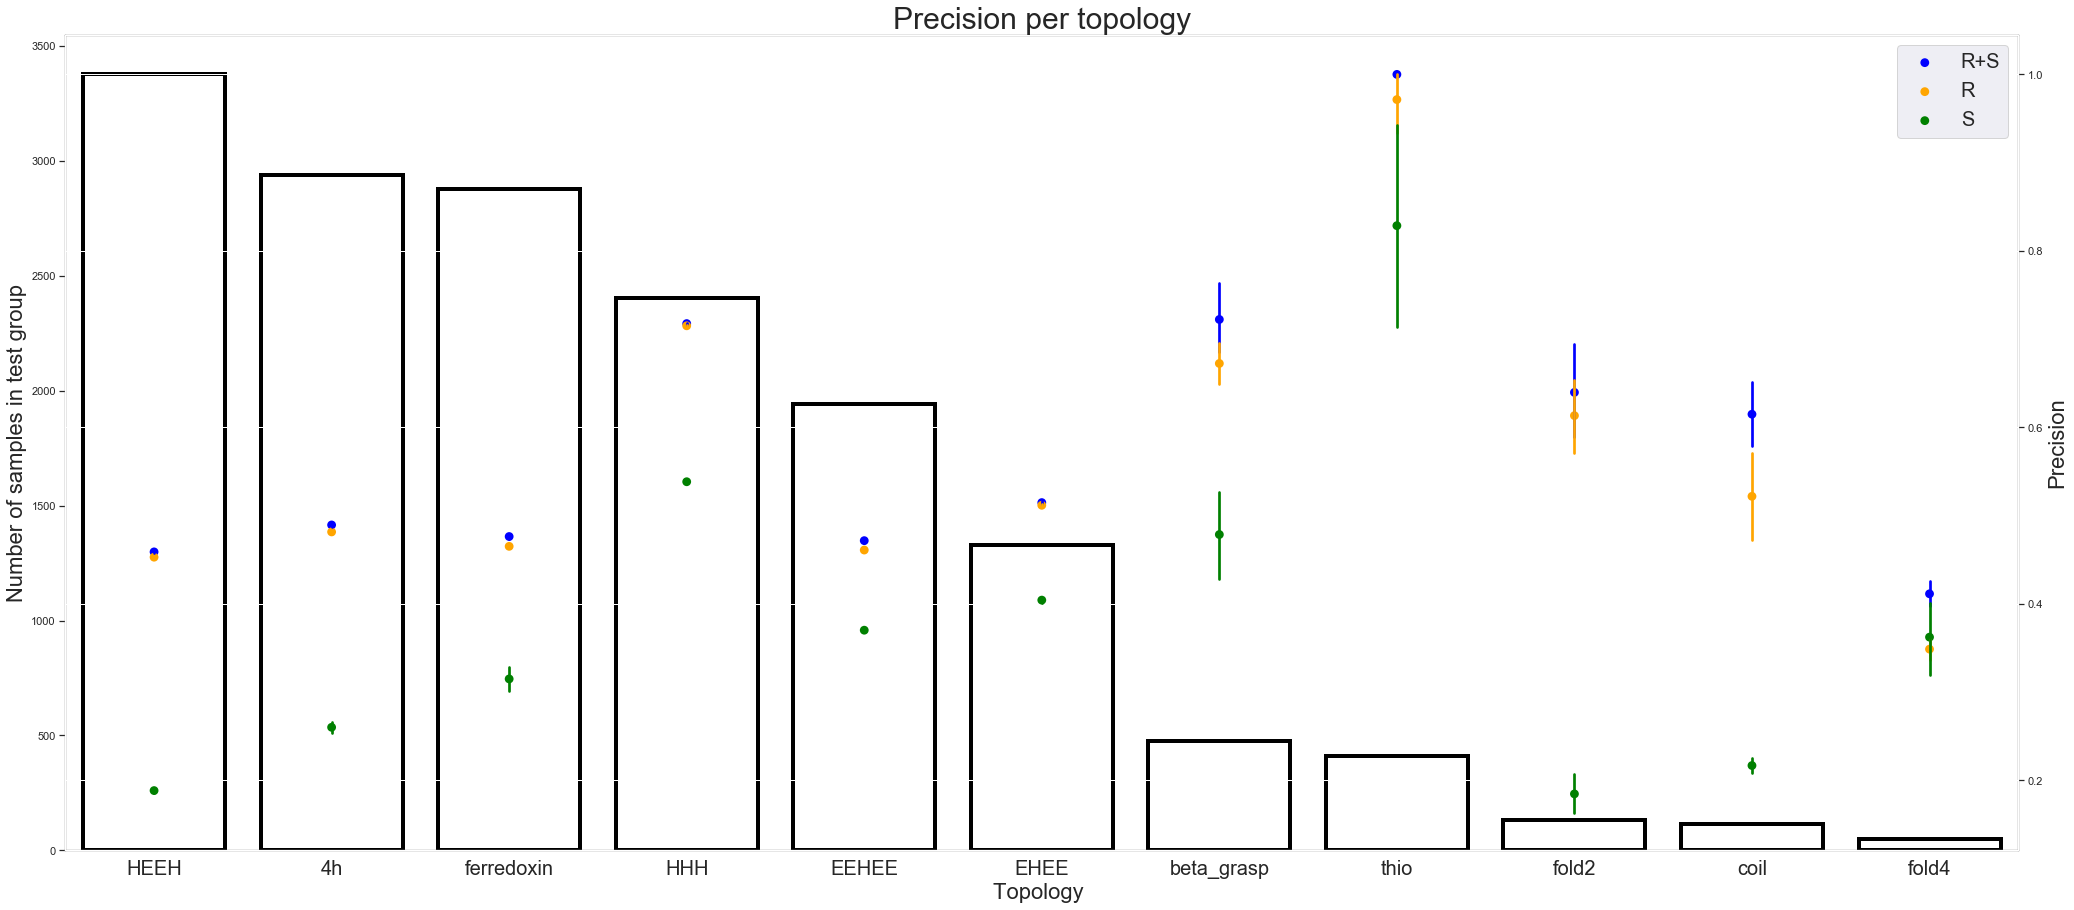

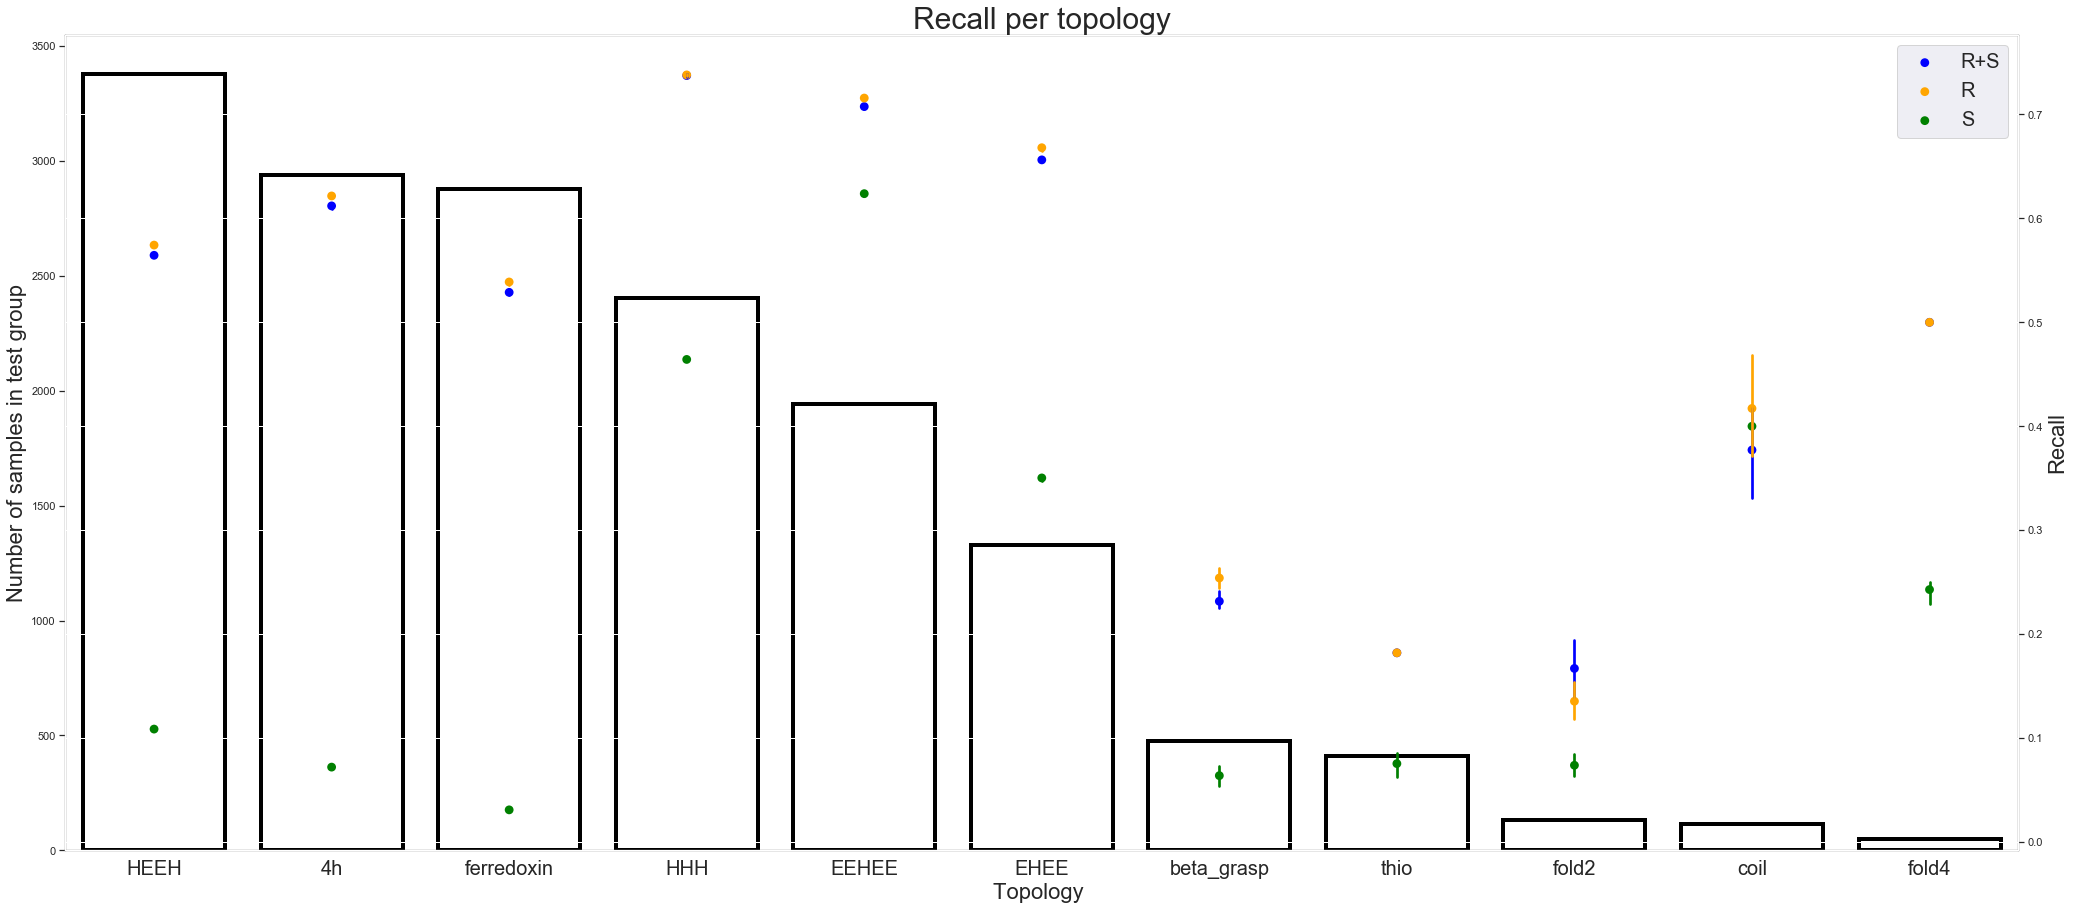

In [13]:
overall_results(
    file_path="./data/topology_specified_classification_leaderboard.html",
    loo_run=False,
    topology_run=True,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='clf'
               )

In [14]:
def labels_to_list(series):

    positions_original = list(range(11))
    positions_new = []
    for i in range(len(series.unique())): 
        topology = series.unique()[i]
        sub = series[series==topology]
        multiplier = len(sub)
        positions_new.append([positions_original[i]]*multiplier)

    #since positions_new was a nested list, break it apart with this for loop
    positions = [item for l in positions_new for item in l]
    return positions

In [16]:
def get_errors_list(series, scores):
    series = series.reset_index(drop=True)
    inx_topologies = []
    errs_list = []
    means_list = []


    for i in range(len(series.unique())):
        top = series.unique()[i]
        inx = series.index[series==top]
        errs_list.append(np.std(scores[inx]))
        means_list.append(np.mean(scores[inx]))

    return errs_list, means_list


HEEH          117
4h            117
ferredoxin    115
EEHEE         114
HHH           114
EHEE          111
coil          105
fold4         105
thio          105
fold2         105
beta_grasp    105
Name: topology, dtype: int64


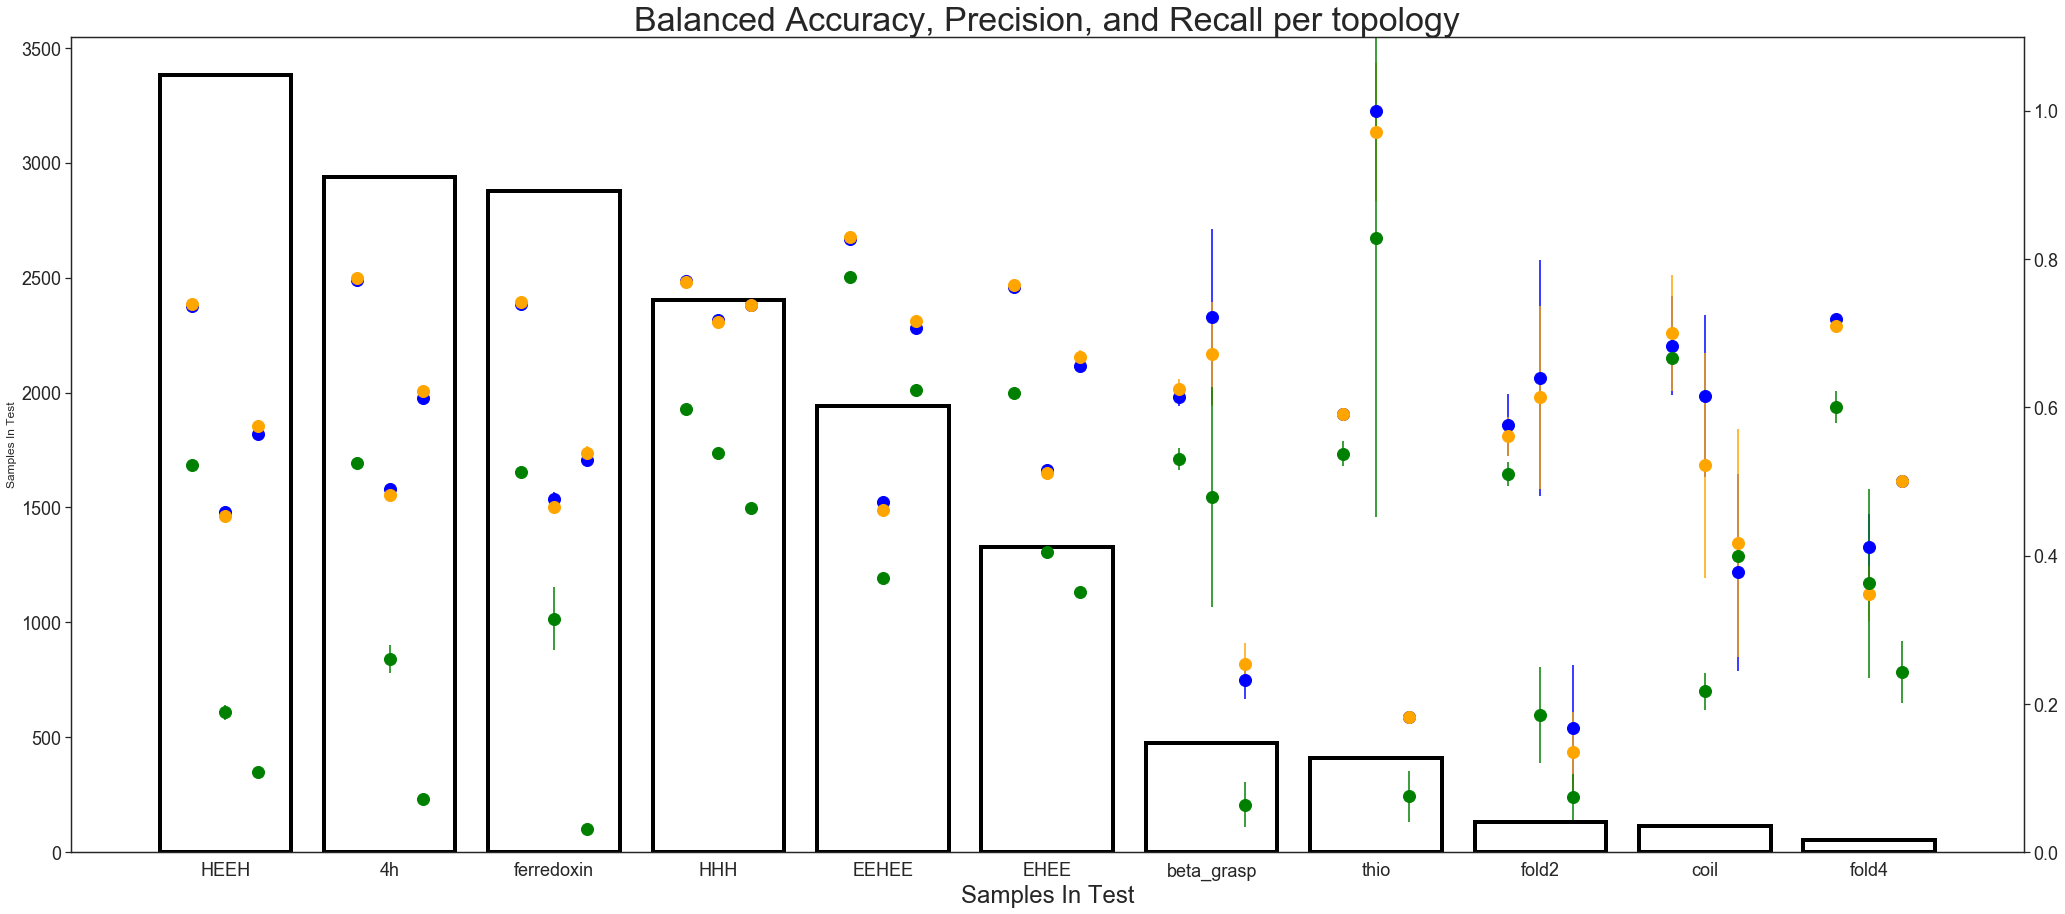

In [18]:
file_path = "./data/topology_specified_classification_leaderboard.html"
model_description_column = 'Data and Split Description'
leaderboard_dataframe = pd.read_html(file_path)[0]


# make an rs, r, and s subset
dataframe_rs = leaderboard_dataframe[
    leaderboard_dataframe[model_description_column]=='RS']
dataframe_r = leaderboard_dataframe[
    leaderboard_dataframe[model_description_column]=='R']
dataframe_s = leaderboard_dataframe[
    leaderboard_dataframe[model_description_column]=='S']

variables_name = 'topology'
df_topology = make_topologies_list(file_path)

tuple_of_list_and_metric = (df_topology,'clf') 


topology_list_df = tuple_of_list_and_metric[0]
score_metric = tuple_of_list_and_metric[1]

clf_scores_names = [
            'Balanced Accuracy',
            'Precision',
            'Recall']


metric_list = clf_scores_names


top_rs = topology_list_df[topology_list_df['model']=='RS']
top_r = topology_list_df[topology_list_df['model']=='R']
top_s = topology_list_df[topology_list_df['model']=='S']



# sort dataframes for plots
top_rs = top_rs.sort_values(by='Samples In Test',ascending=False)
top_r = top_r.sort_values(by='Samples In Test',ascending=False)
top_s = top_s.sort_values(by='Samples In Test',ascending=False)



positions_rs = labels_to_list(top_rs['topology'])
positions_r = labels_to_list(top_r['topology'])
positions_s = labels_to_list(top_s['topology'])

##########################################
offset = [-.2,0,.2]
labels = top_rs['topology'].unique()

sns.set(rc={'figure.figsize':(35,15)})
sns.set_style('white')

fig,ax = plt.subplots(sharex=True)


#ax.set_xticks(np.arange(-0.1,11,0.1))
sns.barplot(
        x=positions_rs,
        y=top_rs['Samples In Test'],
        ax=ax,
        color='white',
        edgecolor='black',
        linewidth=4)
sns.barplot(
        x=positions_r,
        y=top_r['Samples In Test'],
        ax=ax,
        color='white',
        edgecolor='black',
        linewidth=4)
sns.barplot(
        x=positions_s,
        y=top_s['Samples In Test'],
        ax=ax,color='white',
        edgecolor='black',
        linewidth=4)



#makes a second y axis
ax2 = ax.twinx()



for i in range(len(metric_list)):
    

    score_rs = top_rs[metric_list[i]].values
    err_rs,means_list_rs = get_errors_list(top_rs['topology'],score_rs)

    score_r = top_r[metric_list[i]].values
    err_r,means_list_r = get_errors_list(top_r['topology'],score_r)


    score_s = top_s[metric_list[i]].values
    err_s,means_list_s = get_errors_list(top_s['topology'],score_s)

    plt.errorbar(
        x=[x+offset[i] for x in np.unique(positions_rs)],
        y=means_list_rs,
        yerr=err_rs,
        fmt='o',
        color='blue',
        markersize=12.0,
        label="R+S")


    plt.errorbar(
        x=[x+offset[i] for x in np.unique(positions_r)],
        y=means_list_r,
        yerr=err_r,
        fmt='o',
        color='orange',
        markersize=12.0,
        label="R")


    plt.errorbar(
        x=[x+offset[i] for x in np.unique(positions_s)],
        y=means_list_s,
        yerr=err_s,
        fmt='o',
        color='green',
        markersize=12.0,
        label="S")

    
plt.title("Balanced Accuracy, Precision, and Recall per topology",fontsize="34")
plt.xticks(ticks=list(range(11)),labels=labels,fontsize='18')
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=13)
ax2.set_ylim(0,1.1)

ax.set_xlabel('Samples In Test',fontsize='24')

plt.show()



### Regressor Results

4h            303
ferredoxin    303
HEEH          303
EEHEE         303
EHEE          303
thio          303
HHH           303
coil          300
beta_grasp    300
fold4         300
fold2         300
Name: topology, dtype: int64
Plotting Trends:


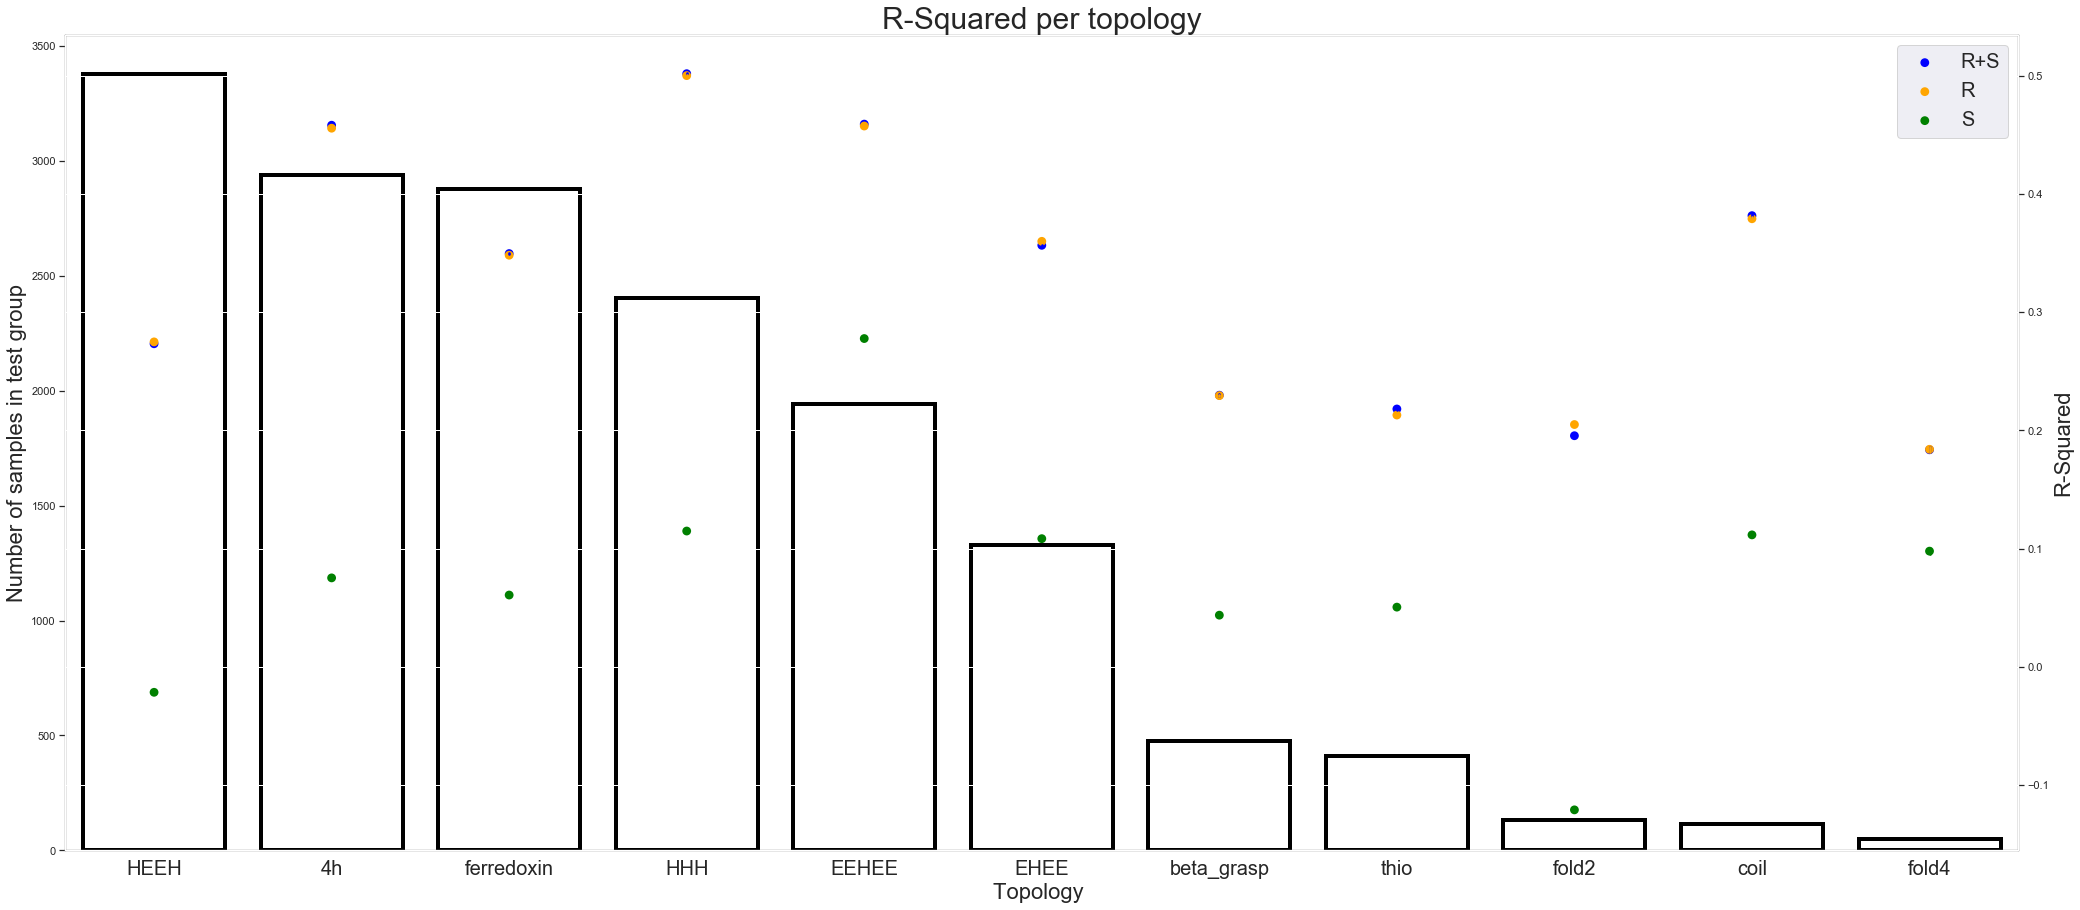

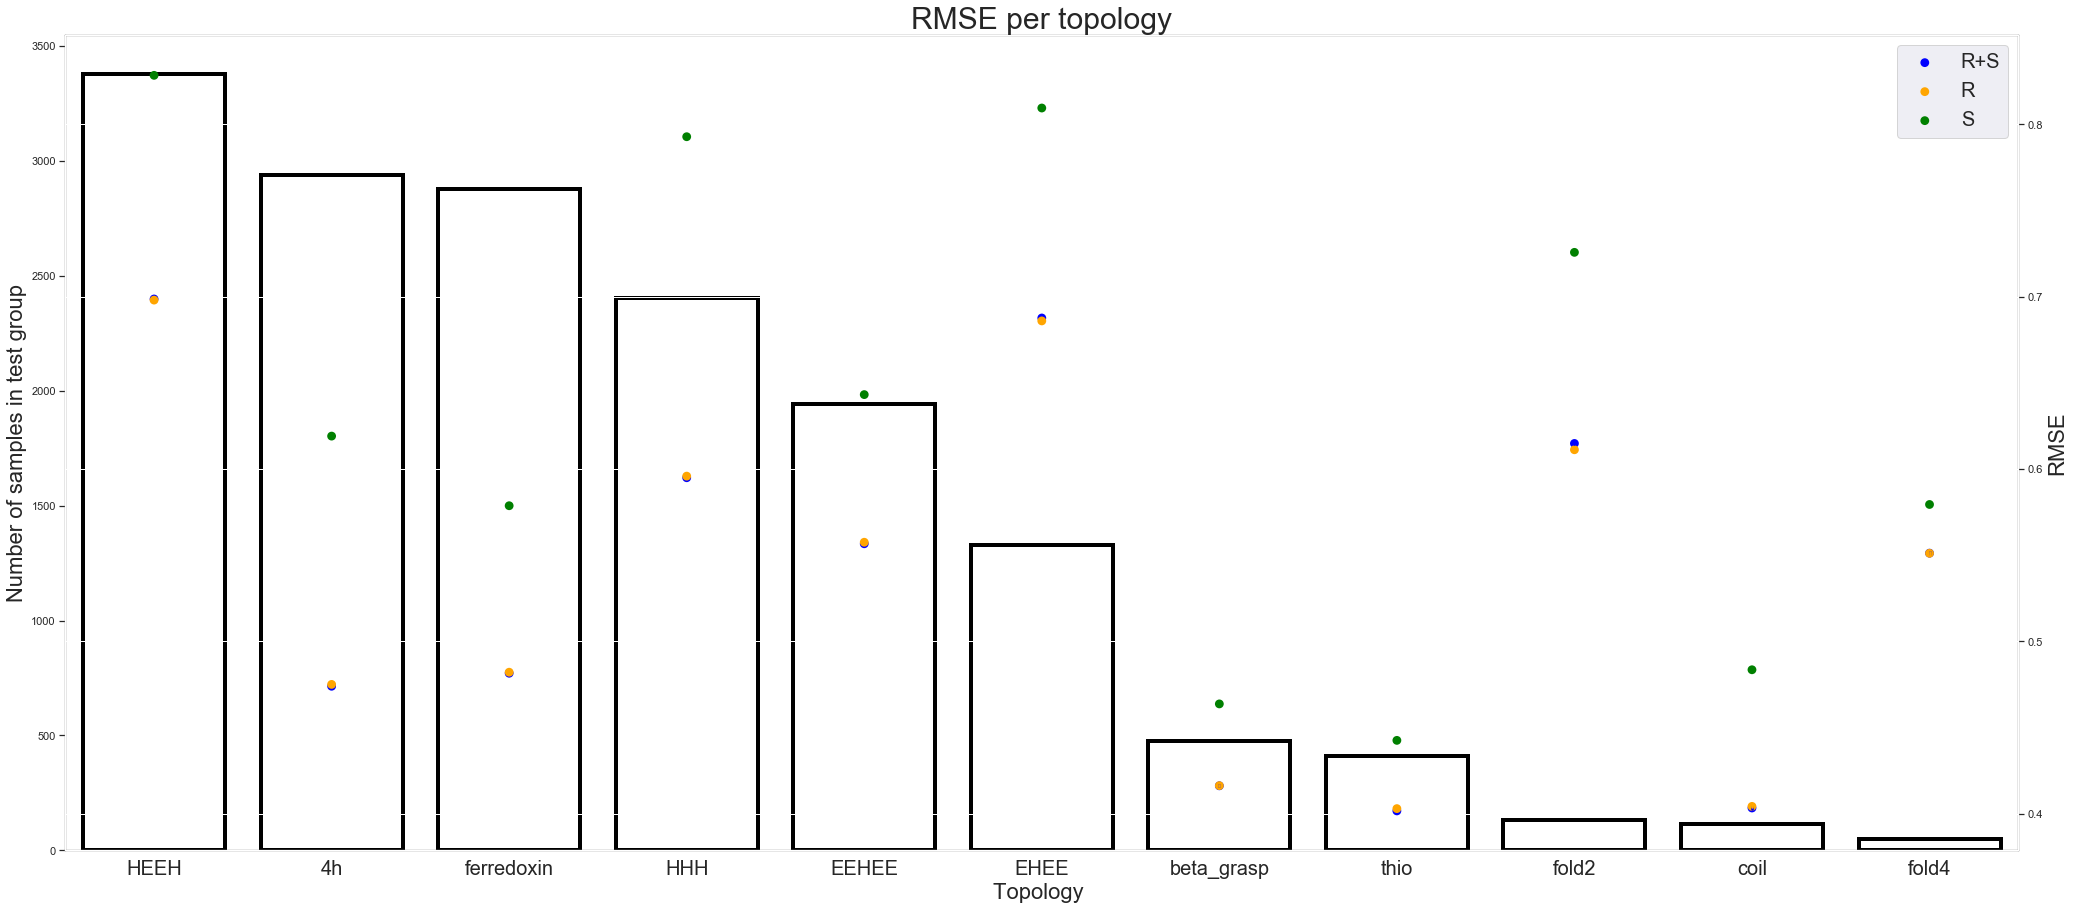

In [19]:
overall_results(
    file_path="./data/topology_specified_regression_leaderboard.html",
    loo_run=False,
    topology_run=True,
    general_run=False,
    model_description_column='Data and Split Description',
    metric='rgr')

------------

# Model Audits

--------------------

**TODO**:
- explain the reasoning for model audits
- explain what SHAP measures
- explain what BBA measures

## SHAP
* genModel == Random Forest model which included all topologies in training and testing

### Generalized Models

In [20]:
#load names for entropy and rosetta features
ros_features = pd.read_csv('./data/rosetta_features.csv')["0"].to_list()
spc_features = pd.read_csv('./data/entropy_features.csv')["0"].to_list()

genModel_clf_shap = pd.read_csv('./data/model_audits/SHAP_genModel_clf_feature_importances.csv')
genModel_clf_shap['is_rosetta'] = genModel_clf_shap["Feature"].isin(ros_features)

genModel_rgr_shap = pd.read_csv('./data/model_audits/SHAP_genModel_rgr_feature_importances.csv')
genModel_rgr_shap['is_rosetta'] = genModel_rgr_shap["Feature"].isin(ros_features)


In [21]:
#classifier model results
genModel_clf_shap[genModel_clf_shap['is_rosetta']==False]

,Feature,Importance,is_rosetta
58,Mean_L_entropy,0.001489,False
68,H_range_entropy,0.001100,False
69,E_min_entropy,0.001099,False
80,SumL_entropies,0.000886,False
81,L_min_entropy,0.000859,False
82,E_range_entropy,0.000857,False
84,E_max_entropy,0.000843,False
85,Mean_H_entropy,0.000777,False
89,H_max_entropy,0.000707,False
90,SumE_entropies,0.000701,False


In [22]:
#regressor model results
genModel_rgr_shap[genModel_rgr_shap['is_rosetta']==False]

,Feature,Importance,is_rosetta
49,Mean_L_entropy,0.002234,False
66,H_max_entropy,0.001493,False
68,L_min_entropy,0.001476,False
71,H_range_entropy,0.001408,False
74,L_max_entropy,0.001325,False
79,Mean_E_entropy,0.001177,False
81,Mean_H_entropy,0.001158,False
83,SumH_entropies,0.001124,False
85,L_range_entropy,0.001083,False
86,Mean_res_entropy,0.001069,False


### Topology Specific Models

In [23]:
# load audit files
shap_4h_clf = pd.read_csv('./data/model_audits/SHAP_4h_clf_feature_importances.csv')
shap_betag_clf = pd.read_csv('./data/model_audits/SHAP_beta_grasp_clf_feature_importances.csv')
shap_coil_clf = pd.read_csv('./data/model_audits/SHAP_coil_clf_feature_importances.csv')
shap_EEHEE_clf = pd.read_csv('./data/model_audits/SHAP_EEHEE_clf_feature_importances.csv')
shap_EHEE_clf = pd.read_csv('./data/model_audits/SHAP_EHEE_clf_feature_importances.csv')
shap_ferr_clf = pd.read_csv('./data/model_audits/SHAP_ferredoxin_clf_feature_importances.csv')
shap_fold2_clf = pd.read_csv('./data/model_audits/SHAP_fold2_clf_feature_importances.csv')
shap_fold4_clf = pd.read_csv('./data/model_audits/SHAP_fold4_clf_feature_importances.csv')
shap_HEEH_clf = pd.read_csv('./data/model_audits/SHAP_HEEH_clf_feature_importances.csv')
shap_HHH_clf = pd.read_csv('./data/model_audits/SHAP_HHH_clf_feature_importances.csv')
shap_thio_clf = pd.read_csv('./data/model_audits/SHAP_thio_clf_feature_importances.csv')

# create a list with all results and corresponding topology names
shap_df_list = [
    shap_4h_clf,shap_betag_clf,shap_coil_clf,shap_EEHEE_clf,
    shap_EHEE_clf,shap_ferr_clf,shap_fold2_clf,shap_fold4_clf,
    shap_HEEH_clf,shap_HHH_clf,shap_thio_clf
]
shap_df_list_names = ['4h','beta_grasp','coil','EEHEE','EHEE','ferredoxin','fold2','fold4','HEEH','HHH','thio']

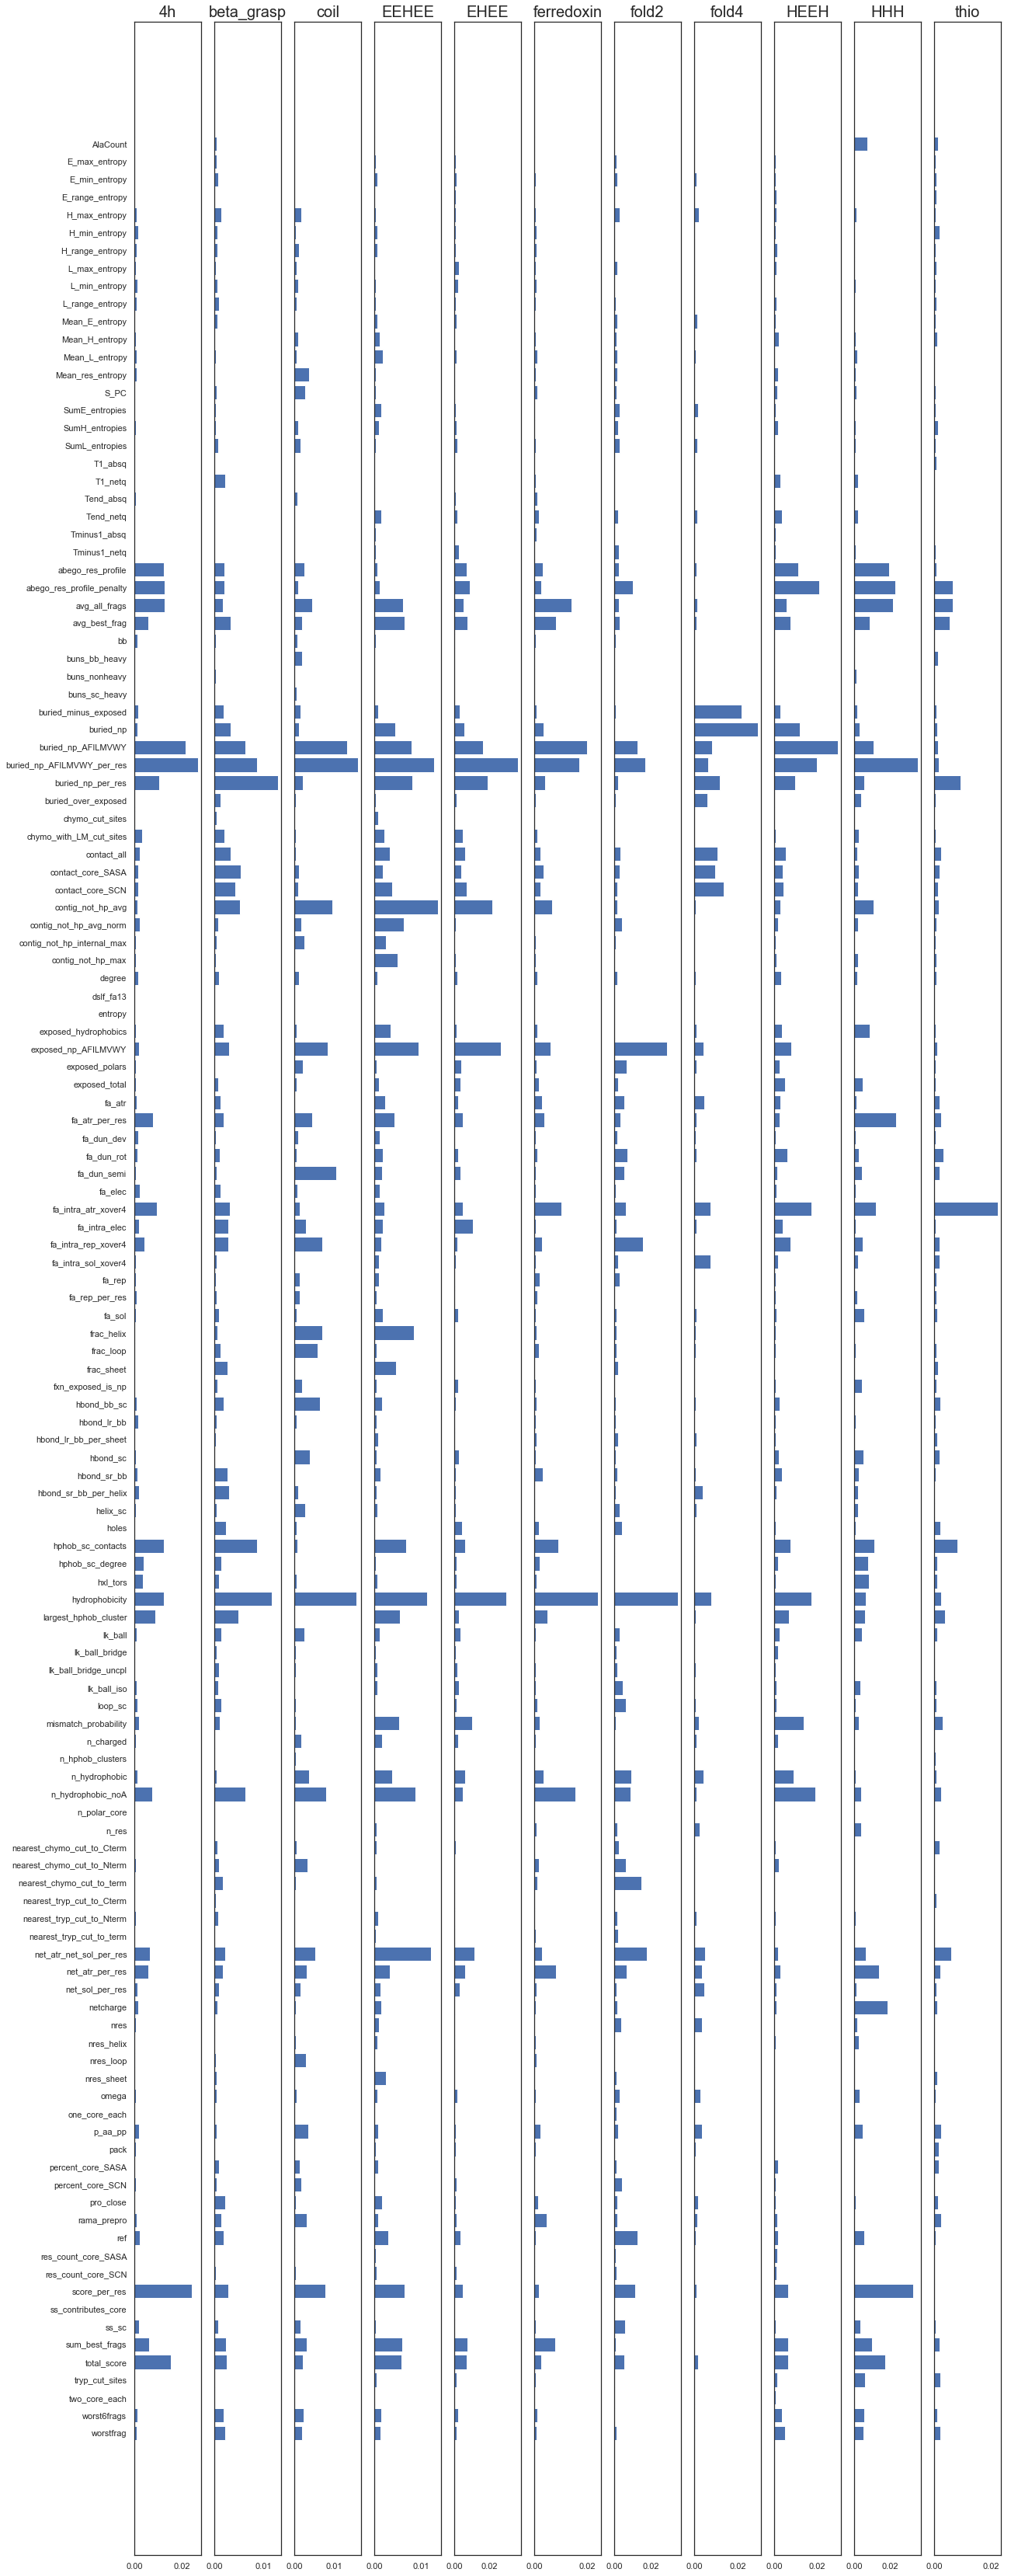

In [24]:
# uncomment below if you want to see the numbers per each topology 

# for i in range(len(shap_df_list)):
#     print("Topology: %s"%shap_df_list_names[i])
#     print(rank_features(shap_df_list[i],just_entropy=True))
#     print("")


## create subplots with a horizontal barplot for each topology, sorted by Feature name
## Extract where in the percentile the entropy features are, for a future visualization

#initialize subplots and create empty list for extracting 
index = shap_df_list_names
data = []
sns.set_style('white')
f,ax = plt.subplots(nrows=1,ncols=len(shap_df_list),figsize=(20,60))


for i in range(len(shap_df_list)): #iterate through each topology's feature importance
    #extract percentiles data
    df = shap_df_list[i]
    data.append(get_count_percentiles_list(df)) # 'get_count_percentiles' returns a list of the number of entropy features in a given percentile list
    
    #plot results from current audit
    plot_data = df.sort_values('Feature',ascending=False)
    ax[i].barh(width=plot_data['Importance'],y=plot_data['Feature'])
    ax[i].set_title("%s"%shap_df_list_names[i],fontsize="20")
    ax[i].get_yaxis().set_visible(False)

ax[0].get_yaxis().set_visible(True)
    
summary_df = pd.DataFrame(data=data,index=index,columns=['35th','50th','75th','85th'])

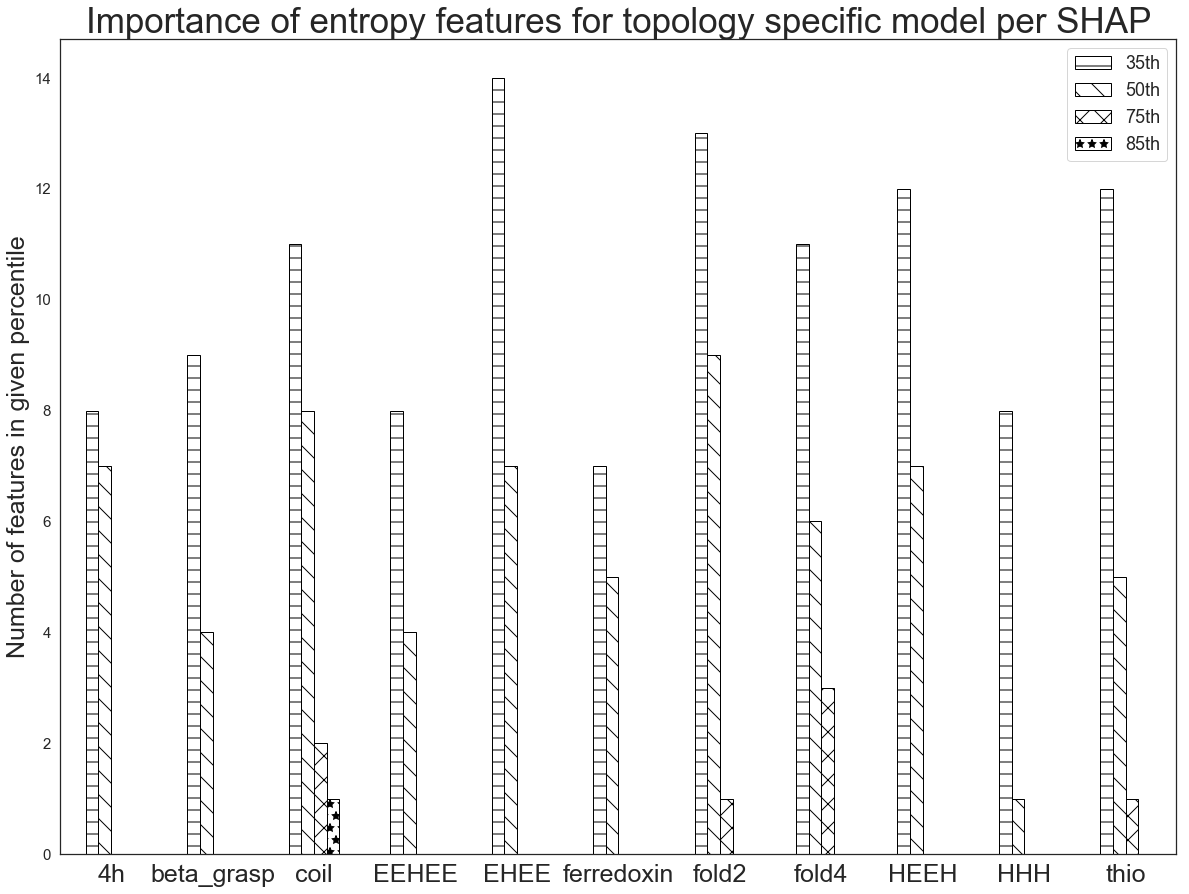

In [25]:
plt.close('all')
sns.set_style('white')
f, ax = plt.subplots(figsize=(20,15))

#plot the percentiles count
summary_df.plot(kind='bar',facecolor='none',edgecolor='black',ax=ax)

#label the graph
sns.set_style('white')
ax.grid(False)
plt.xticks(rotation=0,fontsize='25')
plt.yticks(fontsize='15')
plt.ylabel('Number of features in given percentile',fontsize='25')
plt.title('Importance of entropy features for topology specific model per SHAP',fontsize='35')

bars = ax.patches


# Define some hatches
hatches = ['-', '\\', 'x',"*"]

dash_bars_inx = list(range(11))
slash_bars_inx = list(range(11,22))
x_bars_inx = list(range(22,33))
asterisk_bars_inx = list(range(33,44))

inx_list = [dash_bars_inx,slash_bars_inx,x_bars_inx,asterisk_bars_inx]

#change colors in graph to hatches
for i in range(len(inx_list)):
    hatch_type = hatches[i]
    for j in inx_list[i]:
        bars[j].set_hatch(hatch_type)
        
plt.legend(fontsize='18')

plt.show()

## BlackBoxAuditing (BBA)

### Generalized Models

In [26]:
genModel_clf_bba = pd.read_csv('./data/model_audits/BBA_genModel_clf_feature_importances.csv')
genModel_clf_bba['is_rosetta'] = genModel_clf_bba["Feature"].isin(ros_features)

#classifier model results
genModel_clf_bba[genModel_clf_bba['is_rosetta']==False]

,Feature,Importance,is_rosetta
95,S_PC,0.066113,False
96,Mean_H_entropy,0.066113,False
97,Mean_L_entropy,0.066113,False
98,Mean_E_entropy,0.066113,False
99,Mean_res_entropy,0.066113,False
100,SumH_entropies,0.066113,False
101,SumL_entropies,0.066113,False
102,SumE_entropies,0.066113,False
103,H_min_entropy,0.066113,False
104,H_range_entropy,0.066113,False


In [27]:
# Given the large number of equally most important features per BBA audit, how many of those are Rosetta 
# and how many are configurational entropy features?

max_score = genModel_clf_bba['Importance'].unique()[0]
max_fets = genModel_clf_bba[genModel_clf_bba['Importance']==max_score]
bba_count_ros_fets = len(max_fets[max_fets['is_rosetta']==True])
bba_count_spc_fets = len(max_fets[max_fets['is_rosetta']==False])

print("Most Important per BBA Audit:\n\tcount Rosetta: %s\n\tcount Scnf: %s"%(bba_count_ros_fets,bba_count_spc_fets))

Most Important per BBA Audit:
	count Rosetta: 95
	count Scnf: 16


### Topology Specific Models

In [28]:
bba_4h_clf = pd.read_csv('./data/model_audits/BBA_4h_clf_feature_importances.csv')
bba_betag_clf = pd.read_csv('./data/model_audits/BBA_beta_grasp_clf_feature_importances.csv')
bba_coil_clf = pd.read_csv('./data/model_audits/BBA_coil_clf_feature_importances.csv')
bba_EEHEE_clf = pd.read_csv('./data/model_audits/BBA_EEHEE_clf_feature_importances.csv')
bba_EHEE_clf = pd.read_csv('./data/model_audits/BBA_EHEE_clf_feature_importances.csv')
bba_ferr_clf = pd.read_csv('./data/model_audits/BBA_ferredoxin_clf_feature_importances.csv')
bba_fold2_clf = pd.read_csv('./data/model_audits/BBA_fold2_clf_feature_importances.csv')
bba_fold4_clf = pd.read_csv('./data/model_audits/BBA_fold4_clf_feature_importances.csv')
bba_HEEH_clf = pd.read_csv('./data/model_audits/BBA_HEEH_clf_feature_importances.csv')
bba_HHH_clf = pd.read_csv('./data/model_audits/BBA_HHH_clf_feature_importances.csv')
bba_thio_clf = pd.read_csv('./data/model_audits/BBA_thio_clf_feature_importances.csv')

bba_df_list = [
    bba_4h_clf,bba_betag_clf,bba_coil_clf,bba_EEHEE_clf,
    bba_EHEE_clf,bba_ferr_clf,bba_fold2_clf,bba_fold4_clf,
    bba_HEEH_clf,bba_HHH_clf,bba_thio_clf
]

bba_df_list_names = ['4h','beta_grasp','coil','EEHEE','EHEE','ferredoxin','fold2','fold4','HEEH','HHH','thio']


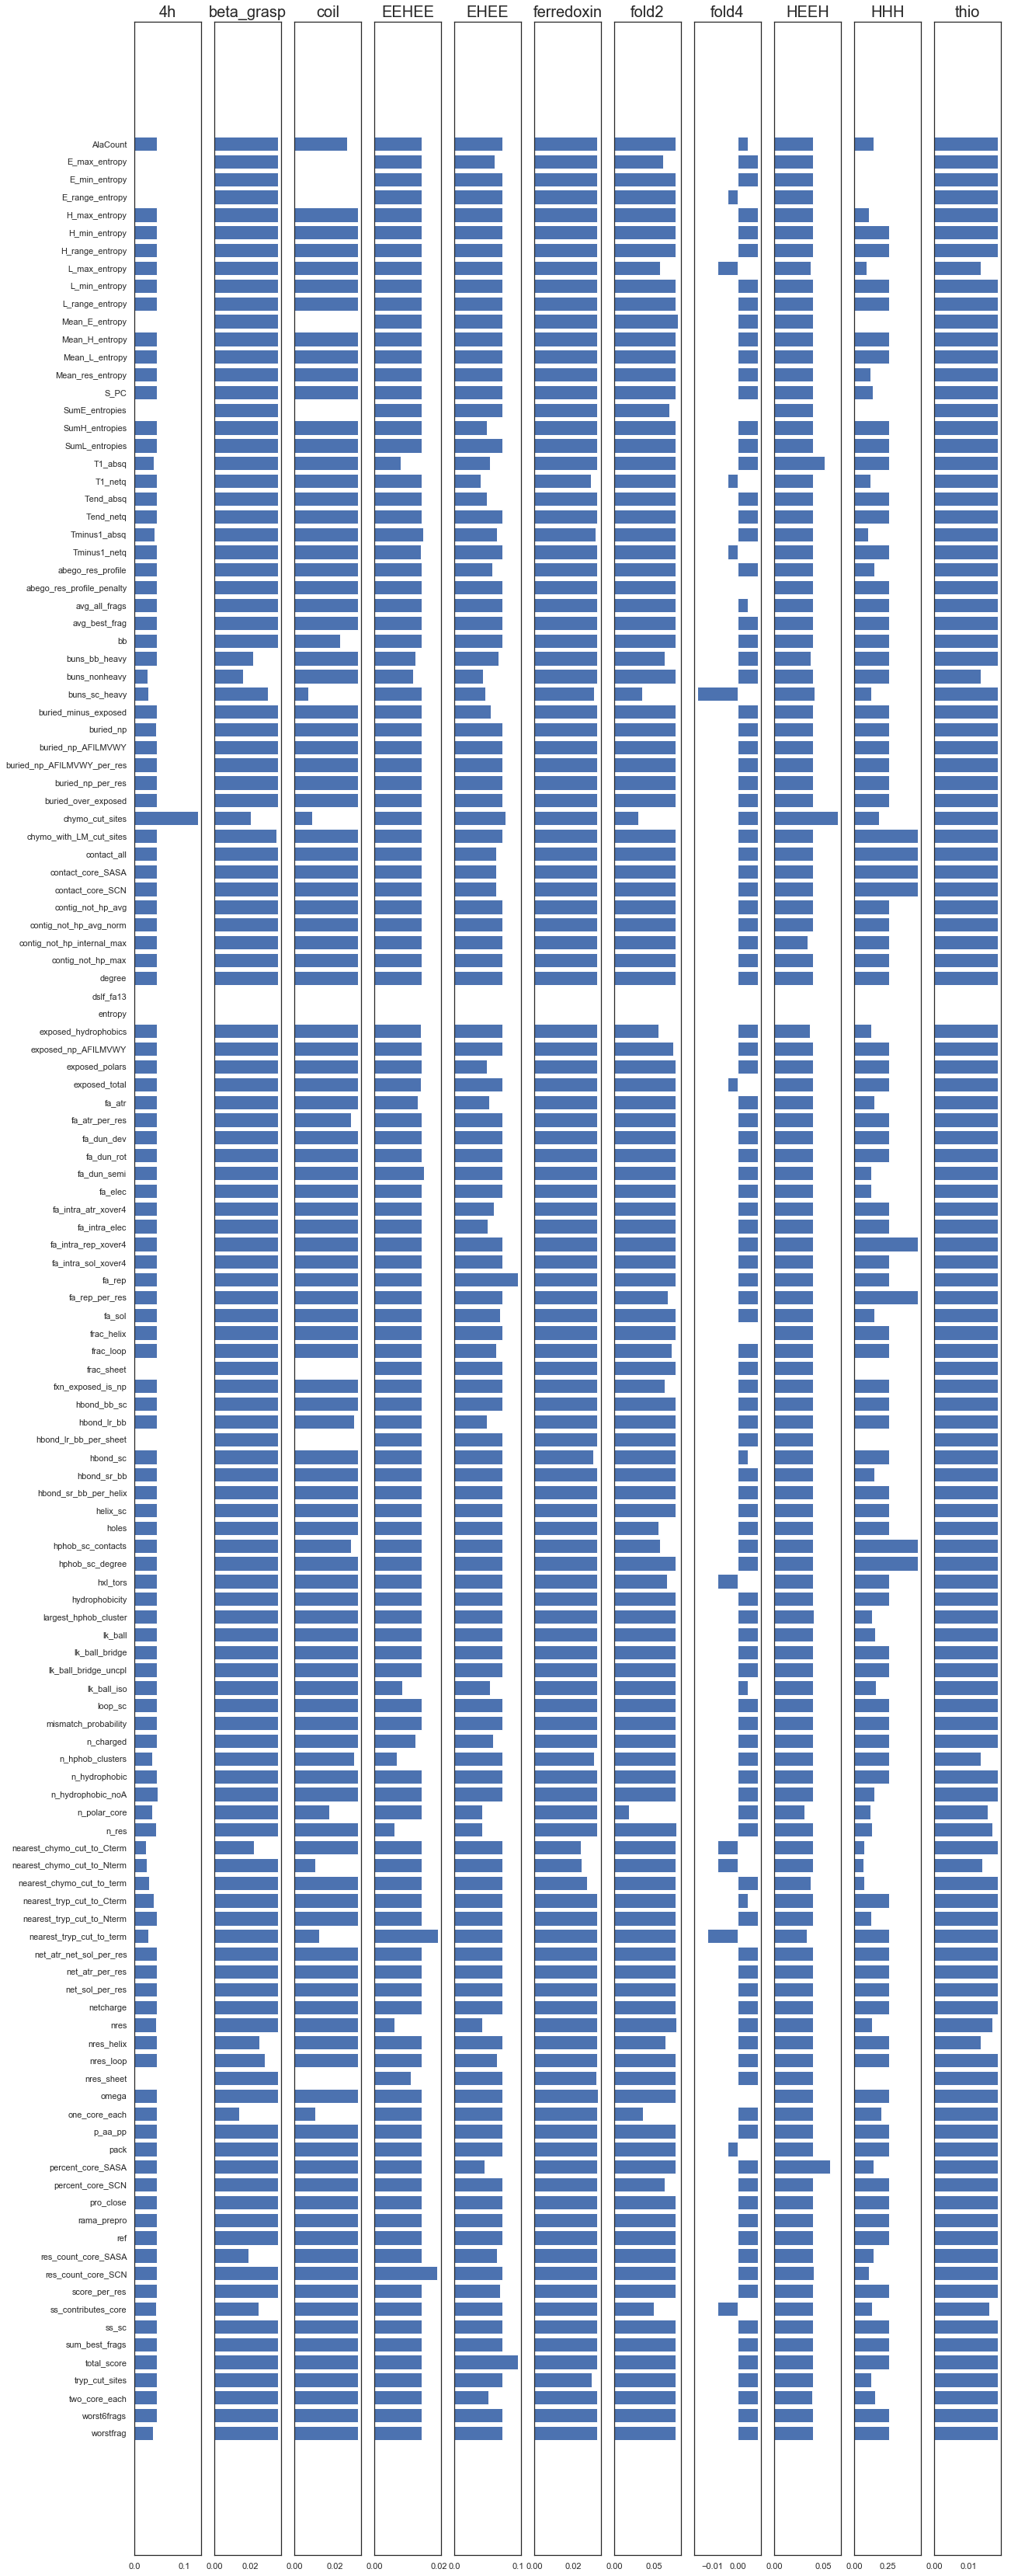

In [29]:
# for i in range(len(bba_df_list)):
#     print("Topology: %s"%bba_df_list_names[i])
#     print(rank_features(bba_df_list[i],just_entropy=False))
#     print("")

index = bba_df_list_names
data = []
sns.set_style("white")
f, ax = plt.subplots(nrows=1,ncols=len(bba_df_list),figsize=(20,60))
for i in range(len(bba_df_list)):
    df = bba_df_list[i]
    data.append(get_count_percentiles_list(df)) # do not delete this part
    
    sns.set_style('white')
    plot_data = df.sort_values('Feature',ascending=False)
    ax[i].barh(width=plot_data['Importance'],y=plot_data['Feature'])
    ax[i].set_title("%s"%bba_df_list_names[i],fontsize="20")
    ax[i].get_yaxis().set_visible(False)
ax[0].get_yaxis().set_visible(True)

summary_df = pd.DataFrame(data=data,index=index,columns=['35th','50th','75th','85th'])

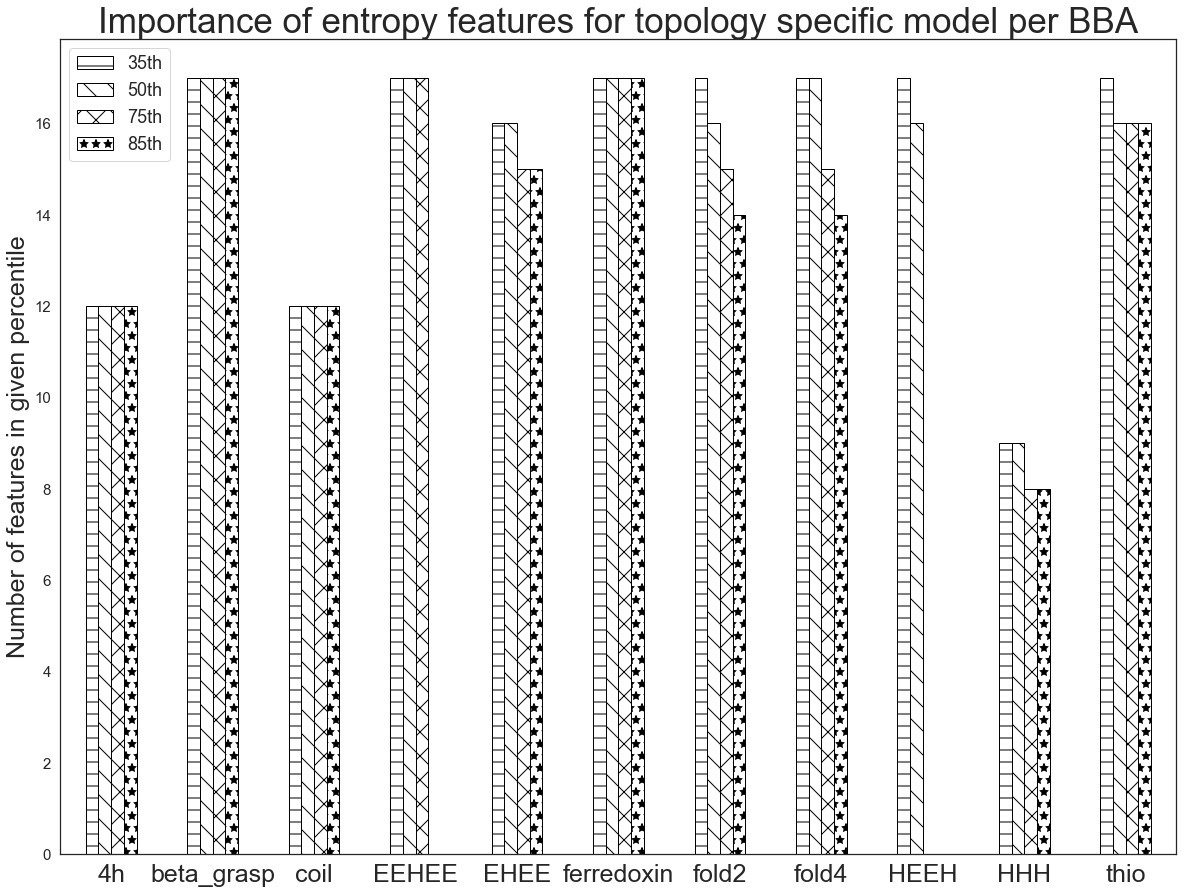

In [30]:
plt.close('all')
f, ax = plt.subplots(figsize=(20,15))

#plot the percentiles count
summary_df.plot(kind='bar',facecolor='none',edgecolor='black',ax=ax)

#label the graph
sns.set_style('white')
ax.grid(False)
plt.xticks(rotation=0,fontsize='25')
plt.yticks(fontsize='15')
plt.ylabel('Number of features in given percentile',fontsize='25')
plt.title('Importance of entropy features for topology specific model per BBA',fontsize='35')

bars = ax.patches


# Define some hatches
hatches = ['-', '\\', 'x',"*"]

dash_bars_inx = list(range(11))
slash_bars_inx = list(range(11,22))
x_bars_inx = list(range(22,33))
asterisk_bars_inx = list(range(33,44))

# dash_bars_inx = list(range(10))
# slash_bars_inx = list(range(10,20))
# x_bars_inx = list(range(20,30))
# asterisk_bars_inx = list(range(30,40))




inx_list = [dash_bars_inx,slash_bars_inx,x_bars_inx,asterisk_bars_inx]

#change colors in graph to hatches
for i in range(len(inx_list)):
    hatch_type = hatches[i]
    for j in inx_list[i]:
        bars[j].set_hatch(hatch_type)
        
plt.legend(fontsize='18')

plt.show()